In [1]:
import os
if not os.path.exists('EDA_Figures'):
    os.makedirs('EDA_Figures')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df= pd.read_csv(r"C:\Users\Administrator\Documents\Excel & CSV Files\credit_risk_cleaned1.csv")
df

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,6.0,PERSONAL,D,35000,16.02,1,...,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,42.8864,-78.8784,Part-time,36,0.643382,15626.153440,0.930628,4,0.228103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,CUST_32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,...,49.2827,-123.1207,Part-time,36,0.109434,15721.464520,0.406065,11,0.892039,1
32569,CUST_32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,...,53.4808,-2.2426,Full-time,60,0.146875,29674.399350,0.394162,6,0.191486,0
32570,CUST_32579,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,...,53.4808,-2.2426,Unemployed,24,0.460526,21098.865050,0.738143,11,0.678980,3
32571,CUST_32580,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,...,37.7749,-122.4194,Self-employed,36,0.100000,26361.525750,0.275744,3,0.223460,1


In [5]:
# Checking default rate and target variable distribution using loan status ( 1= default, 0=paid)
print("Target Variable Distribution:")
print(df['loan_status'].value_counts())
print(f"Default rate: {df['loan_status'].mean()*100:.2f}%")

Target Variable Distribution:
loan_status
0    25465
1     7108
Name: count, dtype: int64
Default rate: 21.82%


### 1. Which type of borrowers are likely to default ###

In [6]:
# Overall default rate
overall_default_rate = df['loan_status'].mean() * 100
print(f"\nOverall Default Rate: {overall_default_rate:.2f}%\n")


Overall Default Rate: 21.82%



QUESTION 1: BORROWER CHARACTERISTICS AND DEFAULT RATES
Default Rate by Age Group:
           Default_Rate  Count
age_group                     
18-27         22.501260  21821
28-37         20.165651   8693
38-47         20.738975   1678
48-57         24.414716    299
58-67         33.846154     65
68-77+        11.764706     17


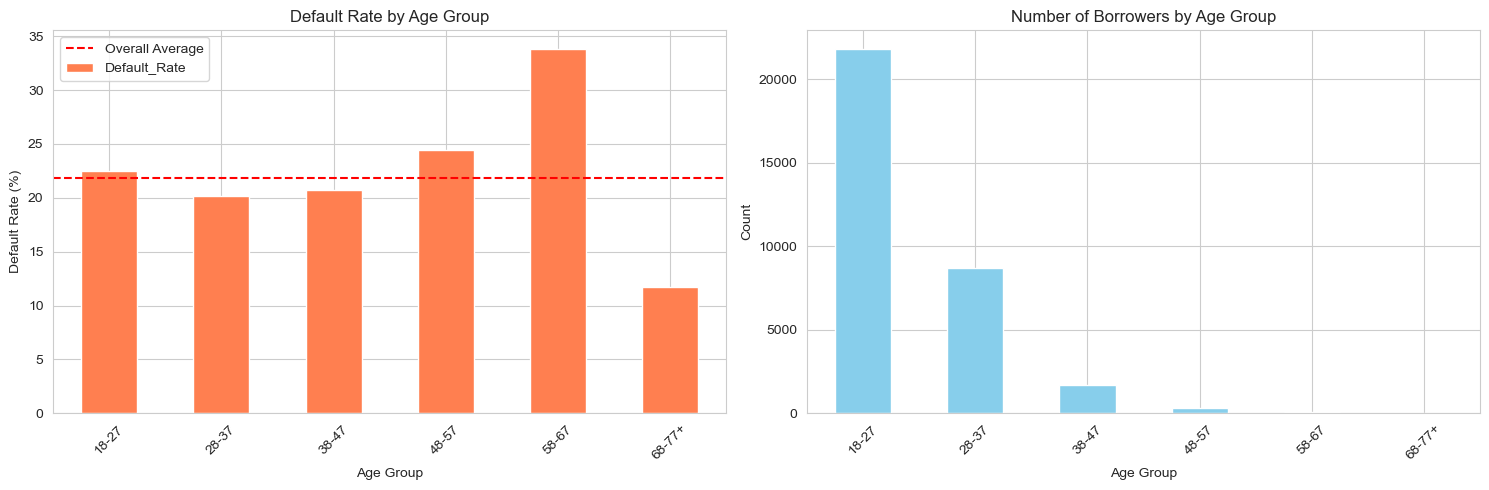


Default Rate by Income Group:
              Default_Rate  Count
income_group                     
<30K             45.537099   4515
30-50K           25.580180   9566
50-75K           17.576136   9621
75-100K          10.992072   4667
>100K             9.538535   4204


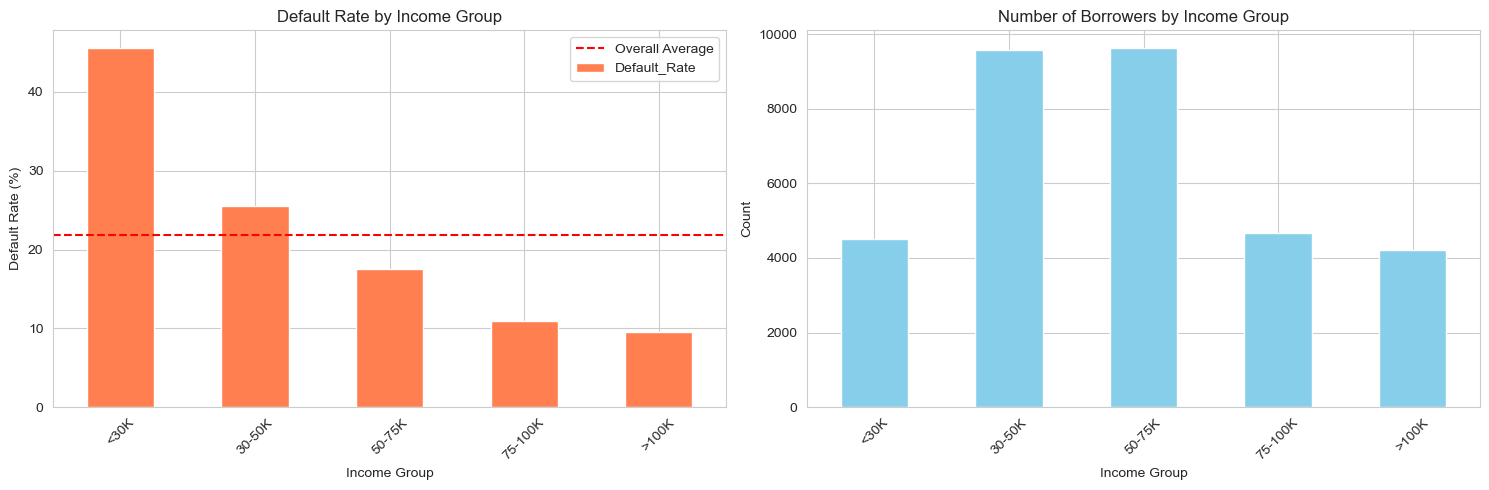


Default Rate by Gender:
        Default_Rate  Count
gender                     
Female     21.874614  16206
Male       21.769414  16367


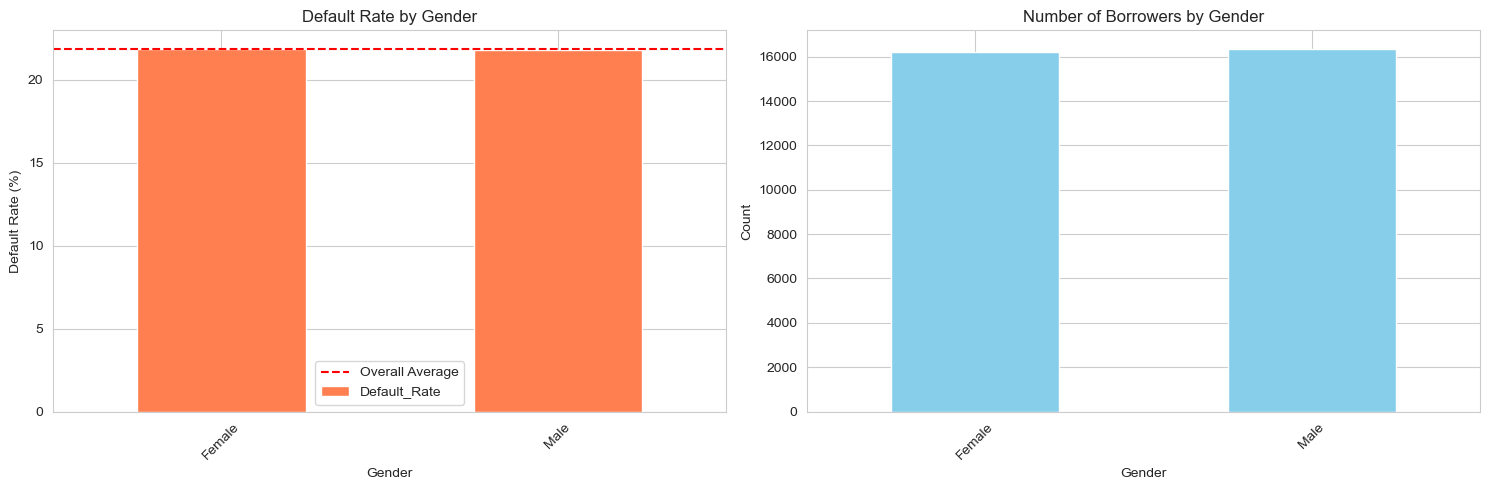


Default Rate by Marital Status:
                Default_Rate  Count
marital_status                     
Divorced           21.815889   3172
Married            21.964709  11391
Single             21.768624  16363
Widowed            21.372192   1647


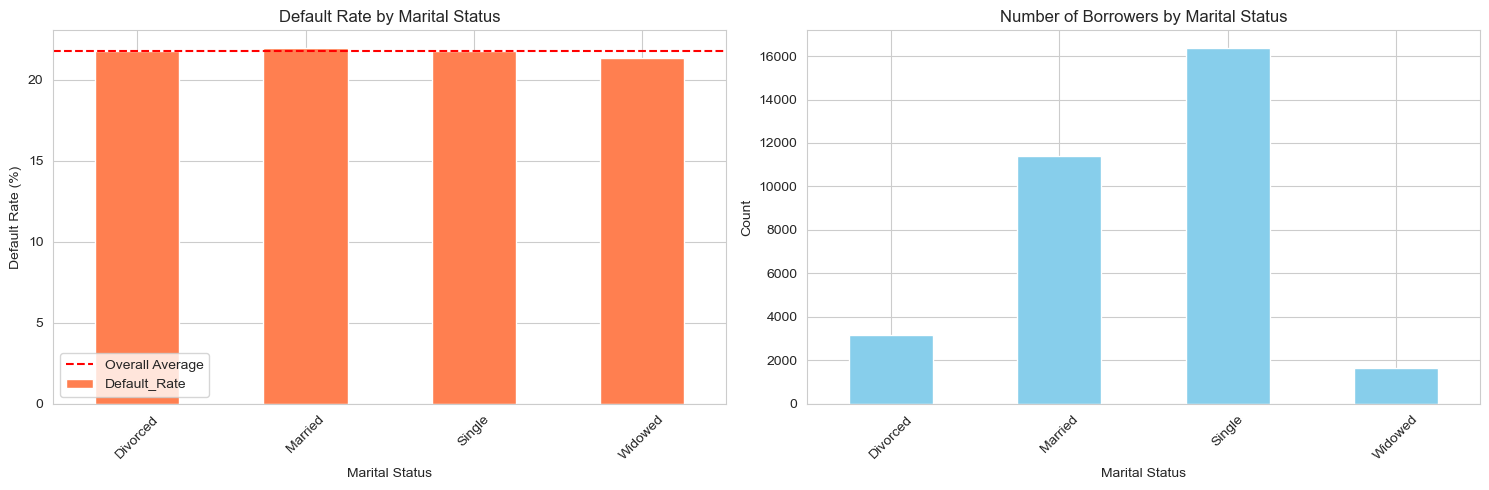


Default Rate by Education Level:
                 Default_Rate  Count
education_level                     
Bachelor            21.417281  11388
High School         22.071320  13180
Master              22.172711   6508
PhD                 21.175685   1497


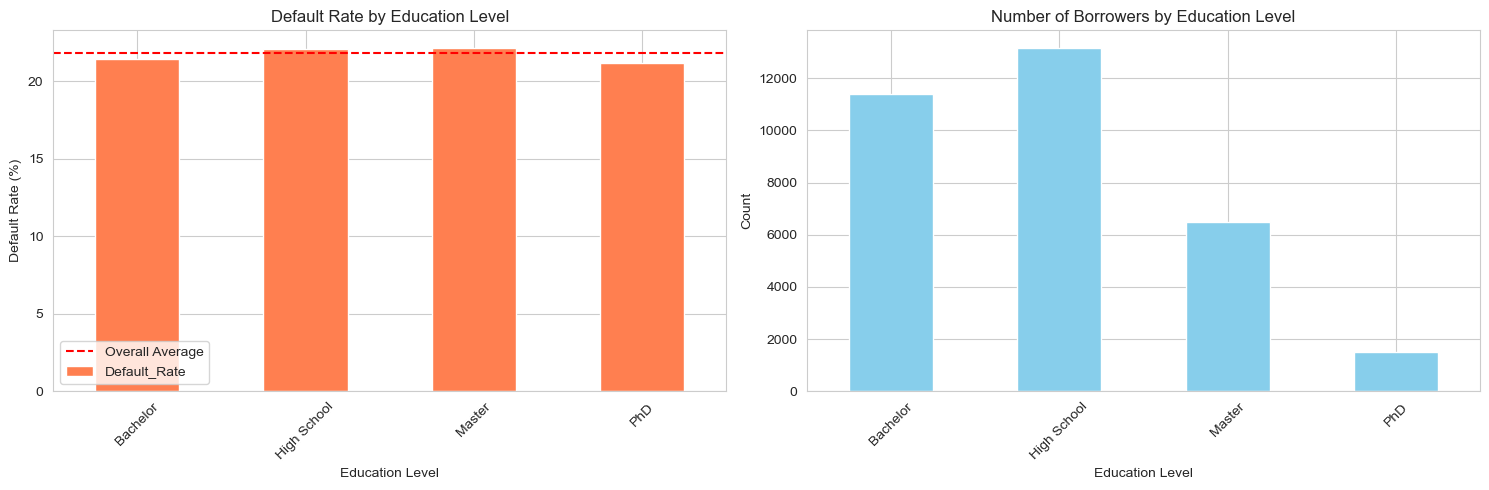

In [7]:
# 1. Age groups
print("=" * 70)
print("QUESTION 1: BORROWER CHARACTERISTICS AND DEFAULT RATES")
print("=" * 70)

df['age_group'] = pd.cut(
    df['person_age'],
    bins=[18, 28, 38, 48, 58, 68, 78,],
    labels=['18-27', '28-37', '38-47', '48-57', '58-67', '68-77+']
)


age_default = df.groupby('age_group', observed=False)['loan_status'].agg(['mean', 'count'])
age_default.columns = ['Default_Rate', 'Count']
age_default['Default_Rate'] = age_default['Default_Rate'] * 100

print("Default Rate by Age Group:")
print(age_default)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

age_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Default Rate by Age Group')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_xlabel('Age Group')
axes[0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Average')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

age_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Number of Borrowers by Age Group')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Age Group')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q1_borrower_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Income Group
df['income_group'] = pd.cut(df['person_income'], 
                             bins=[0, 30000, 50000, 75000, 100000, np.inf],
                             labels=['<30K', '30-50K', '50-75K', '75-100K', '>100K'])

income_default = df.groupby('income_group', observed=False)['loan_status'].agg(['mean', 'count'])
income_default.columns = ['Default_Rate', 'Count']
income_default['Default_Rate'] = income_default['Default_Rate'] * 100

print("\nDefault Rate by Income Group:")
print(income_default)
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Default Rate plot
income_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Default Rate by Income Group')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_xlabel('Income Group')
axes[0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Average')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Count plot
income_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Number of Borrowers by Income Group')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Income Group')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q1_borrower_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Gender
gender_default = df.groupby('gender')['loan_status'].agg(['mean', 'count'])
gender_default.columns = ['Default_Rate', 'Count']
gender_default['Default_Rate'] = gender_default['Default_Rate'] * 100

print("\nDefault Rate by Gender:")
print(gender_default)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Default Rate plot
gender_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Default Rate by Gender')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_xlabel('Gender')
axes[0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Average')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Count plot
gender_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Number of Borrowers by Gender')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Gender')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q1_borrower_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Marital Status
marital_default = df.groupby('marital_status')['loan_status'].agg(['mean', 'count'])
marital_default.columns = ['Default_Rate', 'Count']
marital_default['Default_Rate'] = marital_default['Default_Rate'] * 100

print("\nDefault Rate by Marital Status:")
print(marital_default)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Default Rate plot
marital_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Default Rate by Marital Status')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_xlabel('Marital Status')
axes[0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Average')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Count plot
marital_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Number of Borrowers by Marital Status')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Marital Status')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q1_borrower_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Education Level
education_default = df.groupby('education_level')['loan_status'].agg(['mean', 'count'])
education_default.columns = ['Default_Rate', 'Count']
education_default['Default_Rate'] = education_default['Default_Rate'] * 100

print("\nDefault Rate by Education Level:")
print(education_default)
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Default Rate plot
education_default['Default_Rate'].plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Default Rate by Education Level')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_xlabel('Education Level')
axes[0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Average')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Count plot
education_default['Count'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Number of Borrowers by Education Level')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Education Level')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q1_borrower_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

### 2. Do certain Loan purposes carry more risk? ###


QUESTION 2: LOAN PURPOSE AND DEFAULT RISK

Loan Purpose Analysis:
                   Default_Rate  Count  Avg_Loan_Amount  Avg_Interest_Rate
loan_intent                                                               
DEBTCONSOLIDATION     28.587874   5212      9594.886800          11.010353
MEDICAL               26.709507   6069      9260.442412          11.041835
HOMEIMPROVEMENT       26.102635   3605     10360.520111          11.214257
PERSONAL              19.894908   5519      9574.524370          10.984667
EDUCATION             17.222136   6451      9481.526120          10.965142
VENTURE               14.815463   5717      9582.792549          10.943689


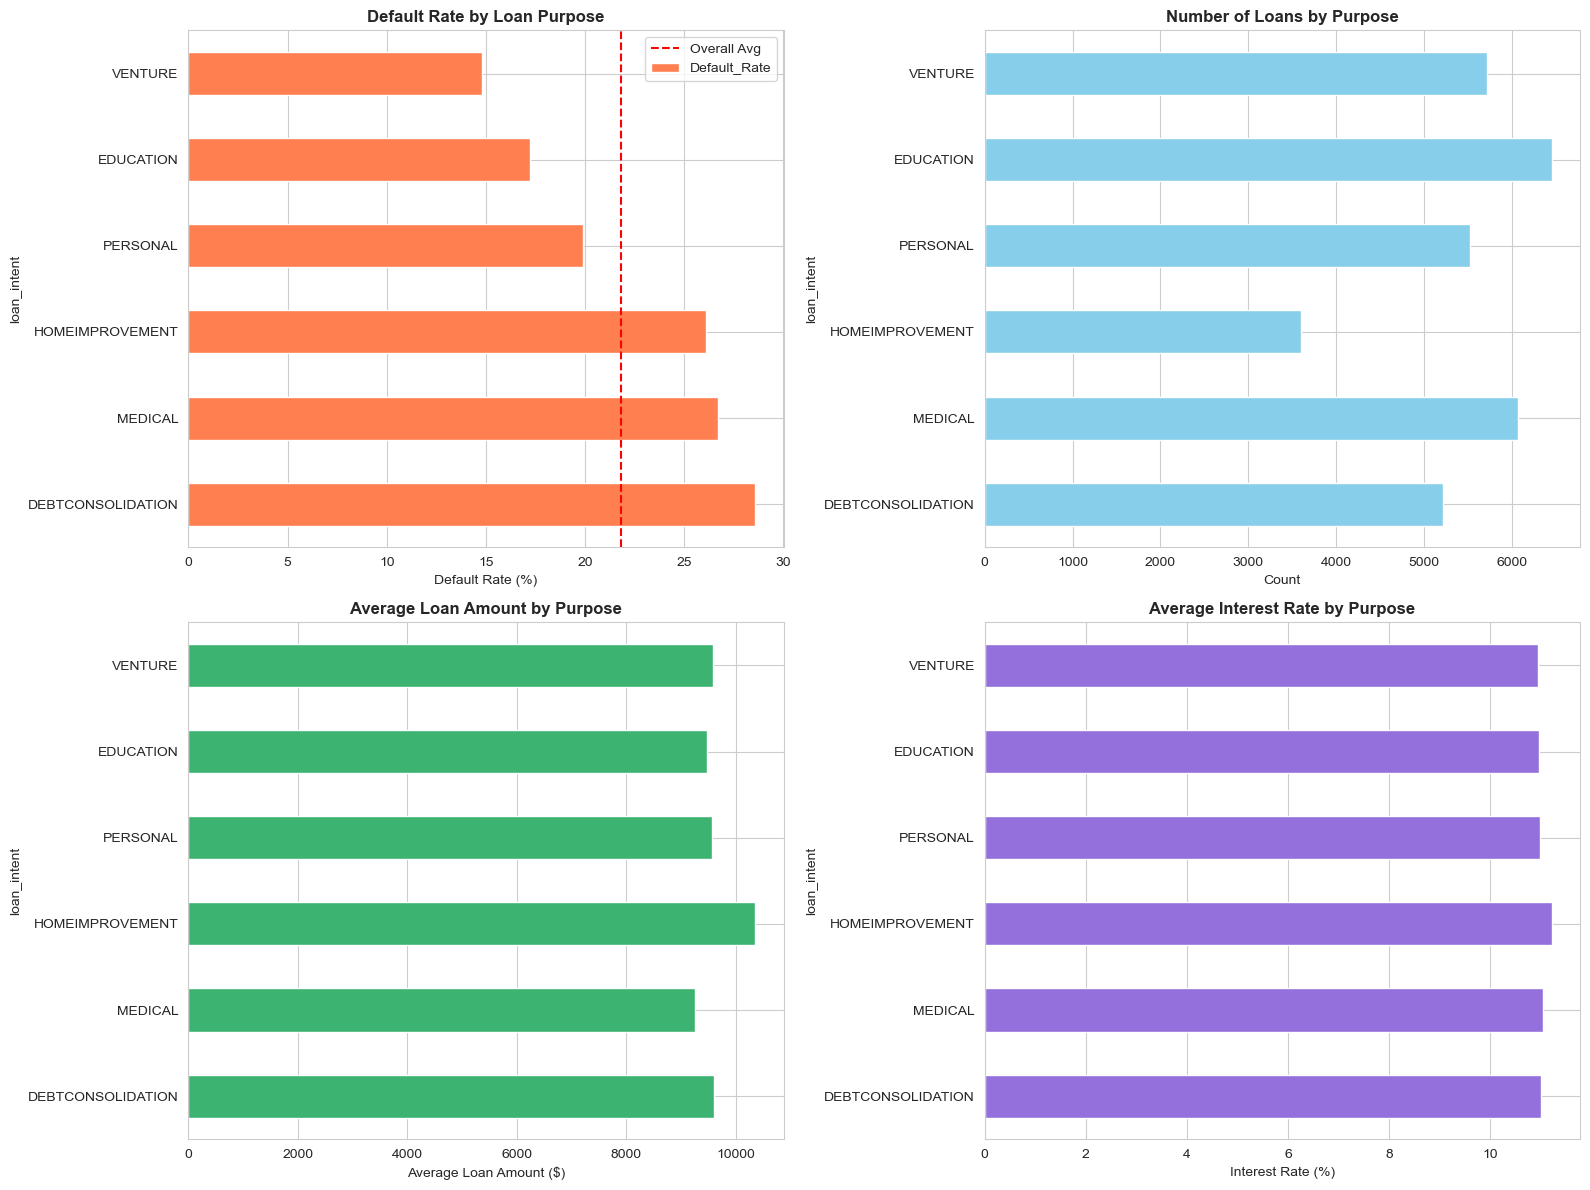


Chi-Square Test:
Chi-square statistic: 520.09
P-value: 0.0000
✓ Loan purpose significantly affects default rate (p < 0.05)


In [8]:
print("\n" + "=" * 70)
print("QUESTION 2: LOAN PURPOSE AND DEFAULT RISK")
print("=" * 70)

# Default rate by loan intent
intent_analysis = df.groupby('loan_intent').agg({
    'loan_status': ['mean', 'count'],
    'loan_amnt': 'mean',
    'loan_int_rate': 'mean'
})
intent_analysis.columns = ['Default_Rate', 'Count', 'Avg_Loan_Amount', 'Avg_Interest_Rate']
intent_analysis['Default_Rate'] = intent_analysis['Default_Rate'] * 100
intent_analysis = intent_analysis.sort_values('Default_Rate', ascending=False)

print("\nLoan Purpose Analysis:")
print(intent_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Default rate by purpose
intent_analysis['Default_Rate'].plot(kind='barh', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Default Rate by Loan Purpose', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Default Rate (%)')
axes[0, 0].axvline(x=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 0].legend()

# Count by purpose
intent_analysis['Count'].plot(kind='barh', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Number of Loans by Purpose', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Count')

# Average loan amount by purpose
intent_analysis['Avg_Loan_Amount'].plot(kind='barh', ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Average Loan Amount by Purpose', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Average Loan Amount ($)')

# Average interest rate by purpose
intent_analysis['Avg_Interest_Rate'].plot(kind='barh', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Average Interest Rate by Purpose', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Interest Rate (%)')

plt.tight_layout()
plt.savefig('EDA_Figures/q2_loan_purpose.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test - Chi-square test for independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['loan_intent'], df['loan_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✓ Loan purpose significantly affects default rate (p < 0.05)")
else:
    print("✗ No significant relationship between loan purpose and default")

### 3. How do loan-to-income and debt-to-income ratios relate to repayment? ###


QUESTION 3: FINANCIAL RATIOS AND DEFAULT
Default Rate by Loan-to-Income Ratio:
              Default_Rate  Count
lti_category                     
0-20%            13.542175  22537
20-40%           36.203413   8908
40-60%           73.994387   1069
60-80%           80.000000     50
>80%              0.000000      1

Default Rate by Debt-to-Income Ratio:
              Default_Rate  Count
dti_category                     
0-20%            11.078646   4107
20-40%           14.997565  18483
40-60%           33.875245   8673
60-80%           71.844660   1236
>80%             74.324324     74

Correlation with Default:
loan_percent_income: 0.3794
  → Moderate positive relationship (corr = 0.3794): higher loan percent income increases default risk.
debt_to_income_ratio: 0.3216
  → Moderate positive relationship (corr = 0.3216): higher debt to income ratio increases default risk.
loan_to_income_ratio: 0.3859
  → Moderate positive relationship (corr = 0.3859): higher loan to income ratio incre

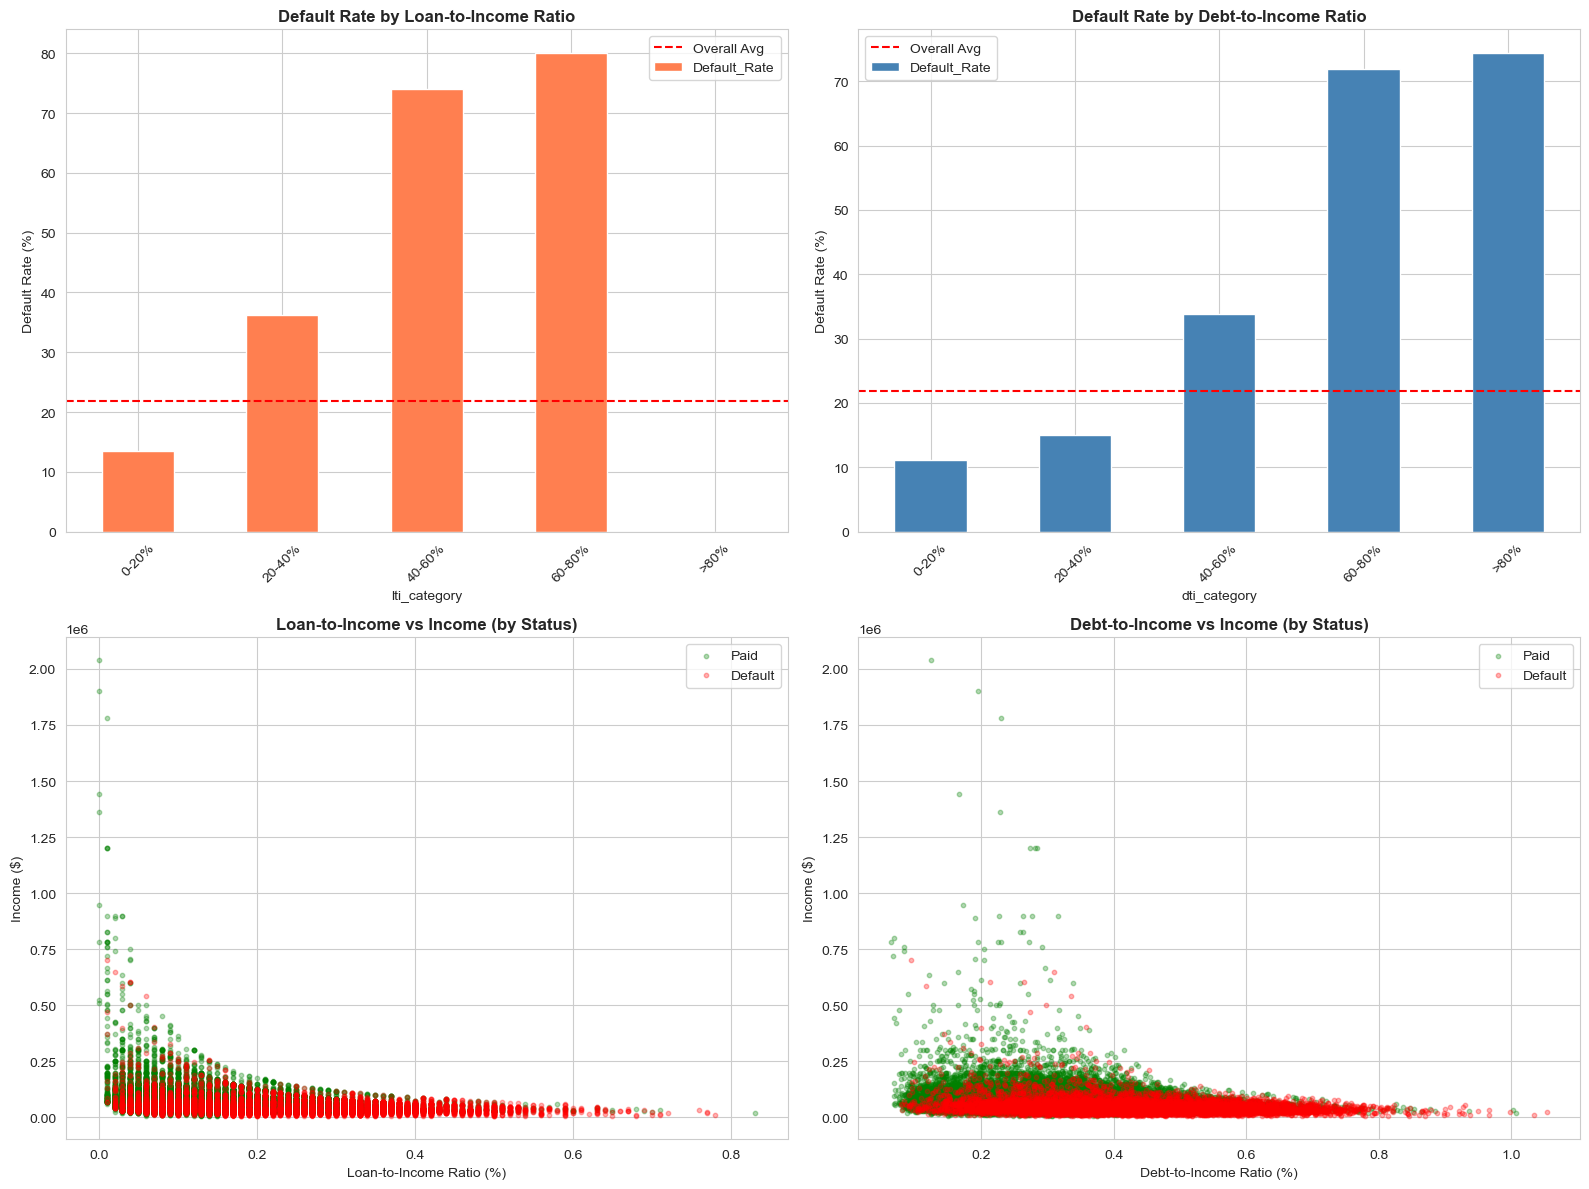

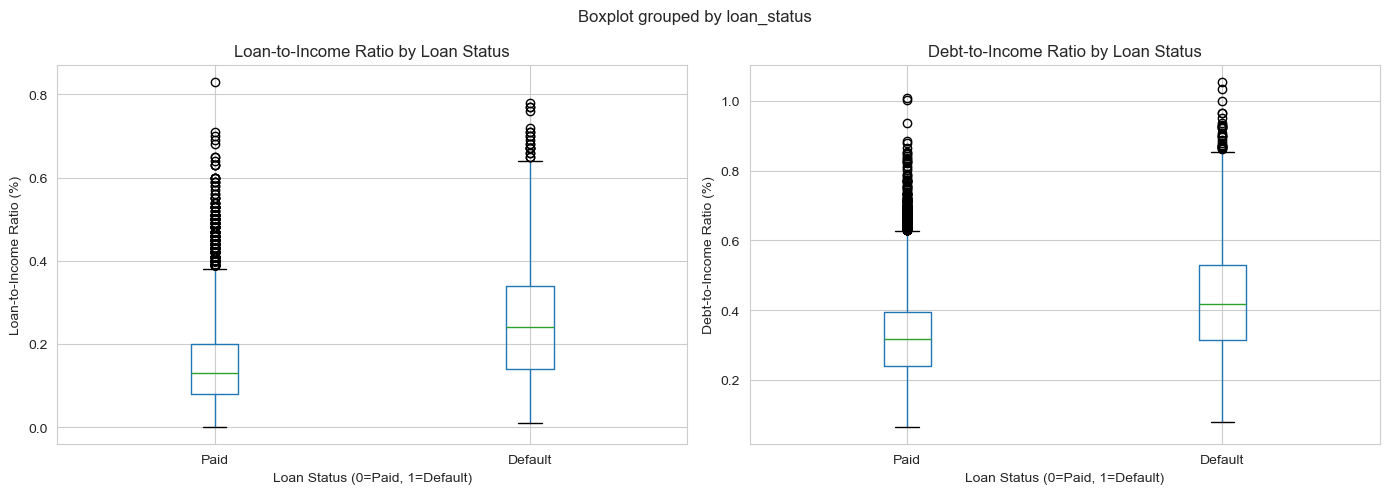

In [9]:
print("\n" + "=" * 70)
print("QUESTION 3: FINANCIAL RATIOS AND DEFAULT")
print("=" * 70)

# Loan-to-Income Ratio Analysis
df['lti_category'] = pd.cut(df['loan_percent_income'], 
                             bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                            labels=['0-20%', '20-40%', '40-60%', '60-80%', '>80%'])

lti_analysis = df.groupby('lti_category', observed=False)['loan_status'].agg(['mean', 'count'])
lti_analysis.columns = ['Default_Rate', 'Count']
lti_analysis['Default_Rate'] = lti_analysis['Default_Rate'] * 100

print("Default Rate by Loan-to-Income Ratio:")
print(lti_analysis)

# Debt-to-Income Ratio Analysis
df['dti_category'] = pd.cut(df['debt_to_income_ratio'],
                             bins=[0, 0.2, 0.4, 0.6, 0.8, 1.1],
                            labels=['0-20%', '20-40%', '40-60%', '60-80%', '>80%'])

dti_analysis = df.groupby('dti_category', observed=False)['loan_status'].agg(['mean', 'count'])
dti_analysis.columns = ['Default_Rate', 'Count']
dti_analysis['Default_Rate'] = dti_analysis['Default_Rate'] * 100

print("\nDefault Rate by Debt-to-Income Ratio:")
print(dti_analysis)

# Correlation analysis
print("\nCorrelation with Default:")
financial_ratios = ['loan_percent_income', 'debt_to_income_ratio', 
                    'loan_to_income_ratio', 'credit_utilization_ratio']
for col in financial_ratios:
    if col in df.columns:
        corr = df[col].corr(df['loan_status'])
        print(f"{col}: {corr:.4f}")
         # Interpretation
        if corr > 0.3:
            print(f"  → Moderate positive relationship (corr = {corr:.4f}): higher {col.replace('_', ' ')} increases default risk.")
        elif corr > 0.1:
            print(f"  → Weak positive relationship (corr = {corr:.4f}): {col.replace('_', ' ')} slightly affects default.")
        else:
            print(f"  → Very weak/no relationship (corr = {corr:.4f}): {col.replace('_', ' ')} has minimal effect on default.")


# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# LTI Default Rate
lti_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Default Rate by Loan-to-Income Ratio', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# DTI Default Rate
dti_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Default Rate by Debt-to-Income Ratio', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Scatter: LTI vs Default
defaulters = df[df['loan_status'] == 1]
non_defaulters = df[df['loan_status'] == 0]

axes[1, 0].scatter(non_defaulters['loan_percent_income'], 
                   non_defaulters['person_income'], 
                   alpha=0.3, s=10, label='Paid', color='green')
axes[1, 0].scatter(defaulters['loan_percent_income'], 
                   defaulters['person_income'], 
                   alpha=0.3, s=10, label='Default', color='red')
axes[1, 0].set_title('Loan-to-Income vs Income (by Status)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Loan-to-Income Ratio (%)')
axes[1, 0].set_ylabel('Income ($)')
axes[1, 0].legend()

# Scatter: DTI vs Default
axes[1, 1].scatter(non_defaulters['debt_to_income_ratio'], 
                   non_defaulters['person_income'], 
                   alpha=0.3, s=10, label='Paid', color='green')
axes[1, 1].scatter(defaulters['debt_to_income_ratio'], 
                   defaulters['person_income'], 
                   alpha=0.3, s=10, label='Default', color='red')
axes[1, 1].set_title('Debt-to-Income vs Income (by Status)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Debt-to-Income Ratio (%)')
axes[1, 1].set_ylabel('Income ($)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('EDA_Figures/q3_financial_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

# Box plots for ratios
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='loan_percent_income', by='loan_status', ax=axes[0])
axes[0].set_title('Loan-to-Income Ratio by Loan Status')
axes[0].set_xlabel('Loan Status (0=Paid, 1=Default)')
axes[0].set_ylabel('Loan-to-Income Ratio (%)')
plt.sca(axes[0])
plt.xticks([1, 2], ['Paid', 'Default'])

df.boxplot(column='debt_to_income_ratio', by='loan_status', ax=axes[1])
axes[1].set_title('Debt-to-Income Ratio by Loan Status')
axes[1].set_xlabel('Loan Status (0=Paid, 1=Default)')
axes[1].set_ylabel('Debt-to-Income Ratio (%)')
plt.sca(axes[1])
plt.xticks([1, 2], ['Paid', 'Default'])

plt.tight_layout()
plt.savefig('EDA_Figures/q3_financial_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

### 4. Does employment type or home ownership make a difference? ###


QUESTION 4: EMPLOYMENT & HOME OWNERSHIP IMPACT
Default Rate by Employment Type:
                 Default_Rate  Count    Avg_Income     Avg_Loan
employment_type                                                
Unemployed          22.667464   1672  66285.017943  9984.524522
Self-employed       22.502031   4924  64987.841389  9516.866369
Part-time           21.838021   6507  65088.144306  9511.429998
Full-time           21.571649  19470  66339.835542  9599.678993

Default Rate by Home Ownership:
                       Default_Rate  Count    Avg_Income      Avg_Loan
person_home_ownership                                                 
RENT                      31.579588  16441  54984.305030   8861.468281
OTHER                     30.841121    107  76387.803738  11074.532710
MORTGAGE                  12.573469  13441  80676.900826  10575.258537
OWN                        7.469040   2584  57834.812693   9029.943885

Default Rate by Employment Length:
                     Default_Rate  Count

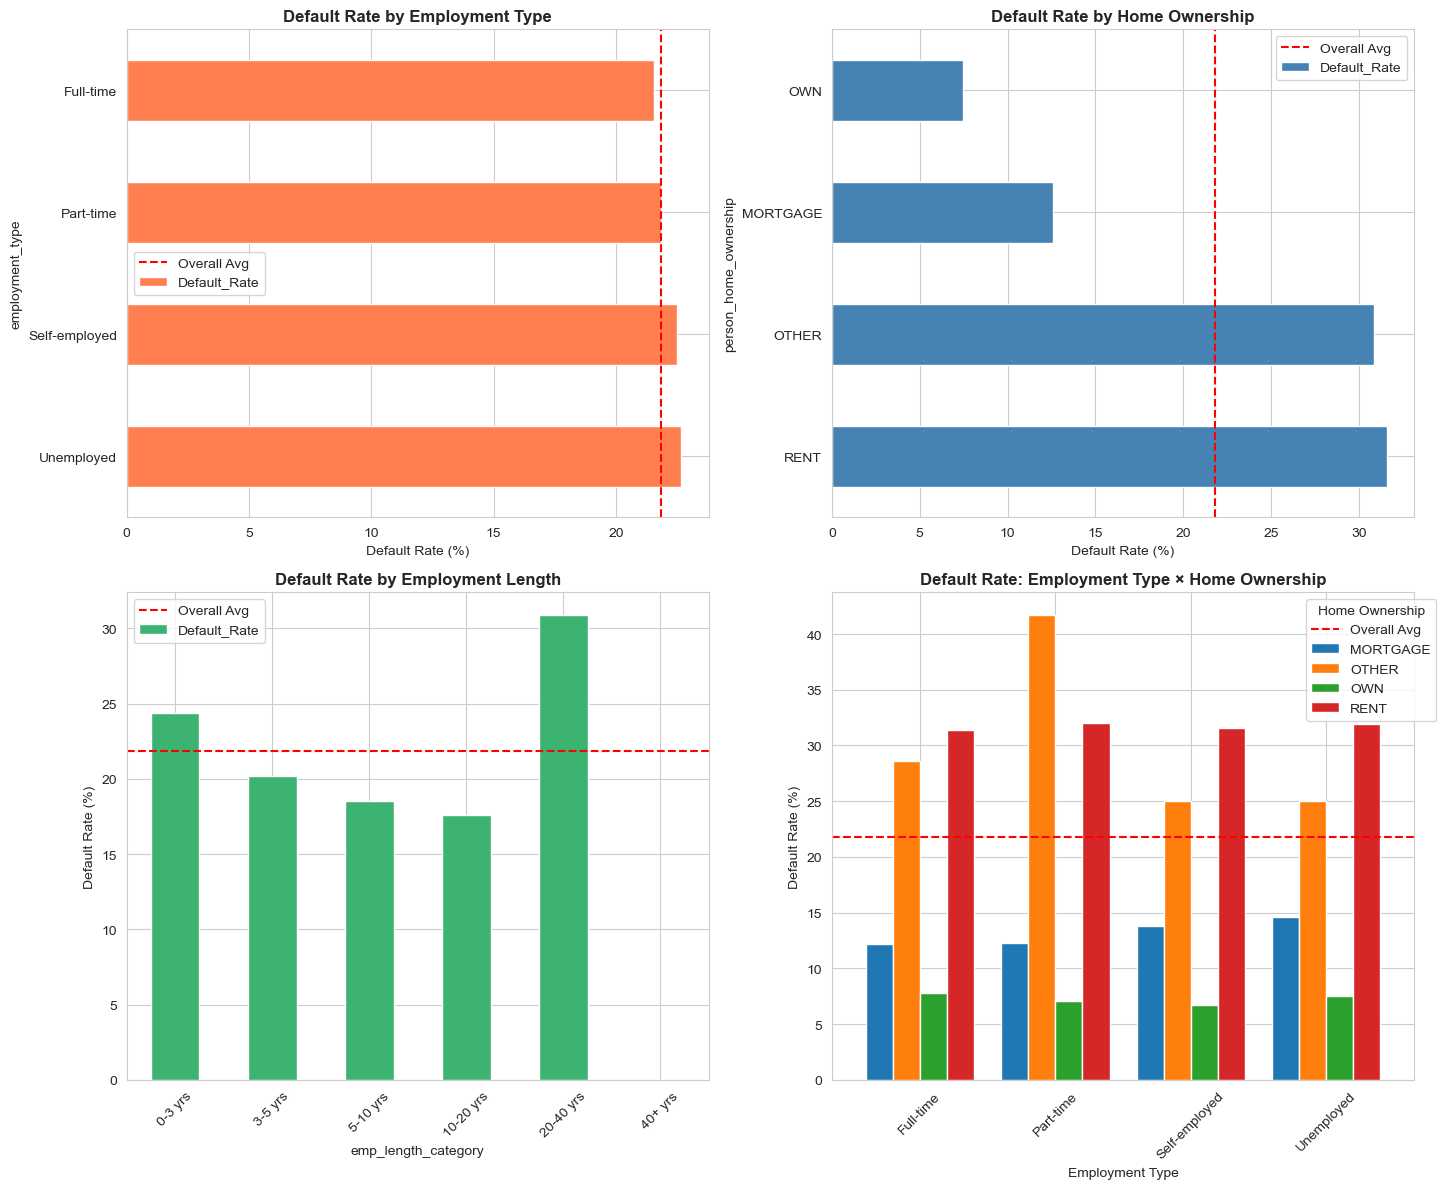

In [10]:
print("\n" + "=" * 70)
print("QUESTION 4: EMPLOYMENT & HOME OWNERSHIP IMPACT")
print("=" * 70)

# Employment Type Analysis
employment_analysis = df.groupby('employment_type').agg({
    'loan_status': ['mean', 'count'],
    'person_income': 'mean',
    'loan_amnt': 'mean'
})
employment_analysis.columns = ['Default_Rate', 'Count', 'Avg_Income', 'Avg_Loan']
employment_analysis['Default_Rate'] = employment_analysis['Default_Rate'] * 100
employment_analysis = employment_analysis.sort_values('Default_Rate', ascending=False)

print("Default Rate by Employment Type:")
print(employment_analysis)

# Home Ownership Analysis
home_analysis = df.groupby('person_home_ownership').agg({
    'loan_status': ['mean', 'count'],
    'person_income': 'mean',
    'loan_amnt': 'mean'
})
home_analysis.columns = ['Default_Rate', 'Count', 'Avg_Income', 'Avg_Loan']
home_analysis['Default_Rate'] = home_analysis['Default_Rate'] * 100
home_analysis = home_analysis.sort_values('Default_Rate', ascending=False)

print("\nDefault Rate by Home Ownership:")
print(home_analysis)

# Employment Length Analysis
df['emp_length_category'] = pd.cut(df['person_emp_length'],
                                    bins=[0, 3, 5, 10, 20, 40, 60 ],
                                    labels=['0-3 yrs', '3-5 yrs', '5-10 yrs', '10-20 yrs', '20-40 yrs', '40+ yrs'])

emp_length_analysis = df.groupby('emp_length_category', observed=False)['loan_status'].agg(['mean', 'count'])
emp_length_analysis.columns = ['Default_Rate', 'Count']
emp_length_analysis['Default_Rate'] = emp_length_analysis['Default_Rate'] * 100

print("\nDefault Rate by Employment Length:")
print(emp_length_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Employment Type
employment_analysis['Default_Rate'].plot(kind='barh', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Default Rate by Employment Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Default Rate (%)')
axes[0, 0].axvline(x=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 0].legend()

# Home Ownership
home_analysis['Default_Rate'].plot(kind='barh', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Default Rate by Home Ownership', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Default Rate (%)')
axes[0, 1].axvline(x=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 1].legend()

# Employment Length
emp_length_analysis['Default_Rate'].plot(kind='bar', ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Default Rate by Employment Length', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Combined: Employment Type + Home Ownership
combined = df.groupby(['employment_type', 'person_home_ownership'])['loan_status'].mean() * 100
combined_df = combined.unstack()
combined_df.plot(kind='bar', ax=axes[1, 1], width=0.8)
axes[1, 1].set_title('Default Rate: Employment Type × Home Ownership', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Default Rate (%)')
axes[1, 1].set_xlabel('Employment Type')
axes[1, 1].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[1, 1].legend(title='Home Ownership', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q4_employmentandhome_ownership.png', dpi=300, bbox_inches='tight')
plt.show()


### 5. How do past defaults or credit histories affect outcomes? ###


QUESTION 5: CREDIT HISTORY IMPACT
Default Rate by Past Default History:
                           Default_Rate  Count  Avg_Interest_Rate  \
cb_person_default_on_file                                           
N                             18.398688  26828          10.264869   
Y                             37.806789   5745          14.511038   

                               Avg_Loan  
cb_person_default_on_file                
N                           9474.917996  
Y                          10123.359443  

Default Rate by Credit History Length:
                      Default_Rate  Count
credit_hist_category                     
0-3 yrs                  22.931541  11905
3-5 yrs                  21.909033   7805
5-10 yrs                 20.637959   9405
10-15 yrs                20.646552   2320
>15 yrs                  21.792619   1138

Default Rate by Past Delinquencies:
                 Default_Rate  Count
delinq_category                     
None                21.775995  19696


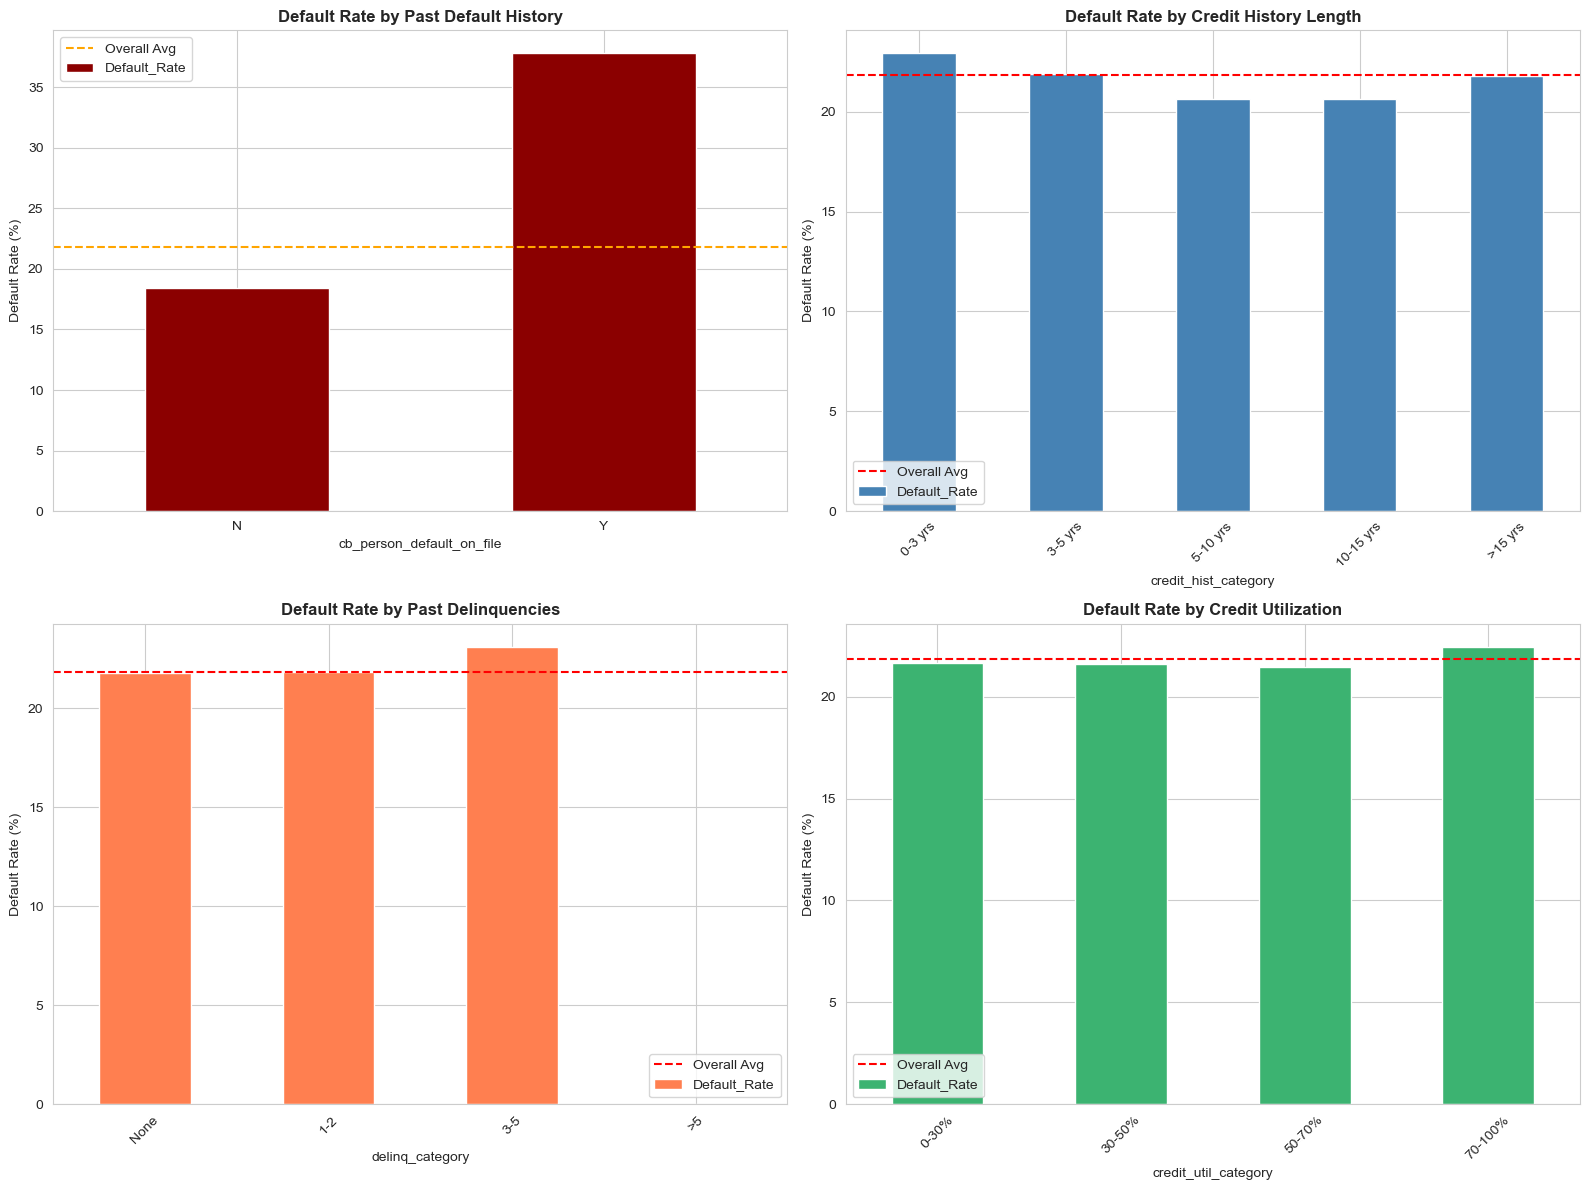


Correlation with Default:
cb_person_cred_hist_length: -0.0153
  → Very weak/no relationship (corr = -0.0153): cb person cred hist length has minimal effect on default.
past_delinquencies: 0.0004
  → Very weak/no relationship (corr = 0.0004): past delinquencies has minimal effect on default.
open_accounts: -0.0028
  → Very weak/no relationship (corr = -0.0028): open accounts has minimal effect on default.
credit_utilization_ratio: 0.0073
  → Very weak/no relationship (corr = 0.0073): credit utilization ratio has minimal effect on default.


In [11]:
print("\n" + "=" * 70)
print("QUESTION 5: CREDIT HISTORY IMPACT")
print("=" * 70)

# Past Default Analysis
default_history = df.groupby('cb_person_default_on_file').agg({
    'loan_status': ['mean', 'count'],
    'loan_int_rate': 'mean',
    'loan_amnt': 'mean'
})
default_history.columns = ['Default_Rate', 'Count', 'Avg_Interest_Rate', 'Avg_Loan']
default_history['Default_Rate'] = default_history['Default_Rate'] * 100

print("Default Rate by Past Default History:")
print(default_history)

# Credit History Length Analysis
df['credit_hist_category'] = pd.cut(df['cb_person_cred_hist_length'],
                                     bins=[0, 3, 5, 10, 15, 100],
                                     labels=['0-3 yrs', '3-5 yrs', '5-10 yrs', '10-15 yrs', '>15 yrs'])

credit_hist_analysis = df.groupby('credit_hist_category', observed=False)['loan_status'].agg(['mean', 'count'])
credit_hist_analysis.columns = ['Default_Rate', 'Count']
credit_hist_analysis['Default_Rate'] = credit_hist_analysis['Default_Rate'] * 100

print("\nDefault Rate by Credit History Length:")
print(credit_hist_analysis)

# Past Delinquencies Analysis
df['delinq_category'] = pd.cut(df['past_delinquencies'],
                                bins=[-1, 0, 2, 5, 100],
                                labels=['None', '1-2', '3-5', '>5'])

delinq_analysis = df.groupby('delinq_category', observed=False)['loan_status'].agg(['mean', 'count'])
delinq_analysis.columns = ['Default_Rate', 'Count']
delinq_analysis['Default_Rate'] = delinq_analysis['Default_Rate'] * 100

print("\nDefault Rate by Past Delinquencies:")
print(delinq_analysis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Past default on file
default_history['Default_Rate'].plot(kind='bar', ax=axes[0, 0], color='darkred')
axes[0, 0].set_title('Default Rate by Past Default History', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].axhline(y=overall_default_rate, color='orange', linestyle='--', label='Overall Avg')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=0)

# Credit history length
credit_hist_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Default Rate by Credit History Length', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Default Rate (%)')
axes[0, 1].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Past delinquencies
delinq_analysis['Default_Rate'].plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Default Rate by Past Delinquencies', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Credit utilization
df['credit_util_category'] = pd.cut(df['credit_utilization_ratio'],
                                     bins=[0, 0.3, 0.5, 0.7, 1.0],
                                     labels=['0-30%', '30-50%', '50-70%', '70-100%'])

credit_util_analysis = df.groupby('credit_util_category', observed=False)['loan_status'].agg(['mean', 'count'])
credit_util_analysis.columns = ['Default_Rate', 'Count']
credit_util_analysis['Default_Rate'] = credit_util_analysis['Default_Rate'] * 100

credit_util_analysis['Default_Rate'].plot(kind='bar', ax=axes[1, 1], color='mediumseagreen')
axes[1, 1].set_title('Default Rate by Credit Utilization', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Default Rate (%)')
axes[1, 1].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q5_credit_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation with credit history features
print("\nCorrelation with Default:")
credit_features = ['cb_person_cred_hist_length', 'past_delinquencies', 
                   'open_accounts', 'credit_utilization_ratio']

for col in credit_features:
    corr = df[col].corr(df['loan_status'])
    print(f"{col}: {corr:.4f}")
    
    # Interpretation
    if corr > 0.3:
        print(f"  → Moderate positive relationship (corr = {corr:.4f}): higher {col.replace('_', ' ')} increases default risk.")
    elif corr > 0.1:
        print(f"  → Weak positive relationship (corr = {corr:.4f}): {col.replace('_', ' ')} slightly affects default.")
    elif corr < -0.3:
        print(f"  → Moderate negative relationship (corr = {corr:.4f}): higher {col.replace('_', ' ')} decreases default risk.")
    elif corr < -0.1:
        print(f"  → Weak negative relationship (corr = {corr:.4f}): {col.replace('_', ' ')} slightly decreases default.")
    else:
        print(f"  → Very weak/no relationship (corr = {corr:.4f}): {col.replace('_', ' ')} has minimal effect on default.")


In [12]:
print(df['credit_utilization_ratio'].min(), df['credit_utilization_ratio'].max())

0.050001436 0.949998246


### 6. Are there differences between USA, UK, and Canada? ###


QUESTION 6: GEOGRAPHIC ANALYSIS (USA, UK, CANADA)
Default Rate by Country:
         Default_Rate  Count    Avg_Income     Avg_Loan  Avg_Interest_Rate  \
country                                                                      
Canada      21.867755  10783  65861.020217  9641.124919          11.040705   
UK          21.730787  10943  66309.805081  9574.326053          10.992431   
USA         21.867798  10847  65473.057620  9552.844104          11.008549   

           Avg_Age  
country             
Canada   27.707317  
UK       27.723659  
USA      27.706924  

Loan Purpose Distribution by Country (%):
loan_intent  DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT    MEDICAL  \
country                                                                 
Canada               16.043773  20.467402        10.850413  18.195307   
UK                   15.891437  19.482774        11.340583  19.382253   
USA                  16.068959  19.470821        11.007652  18.309210   

loan_intent   PERSO

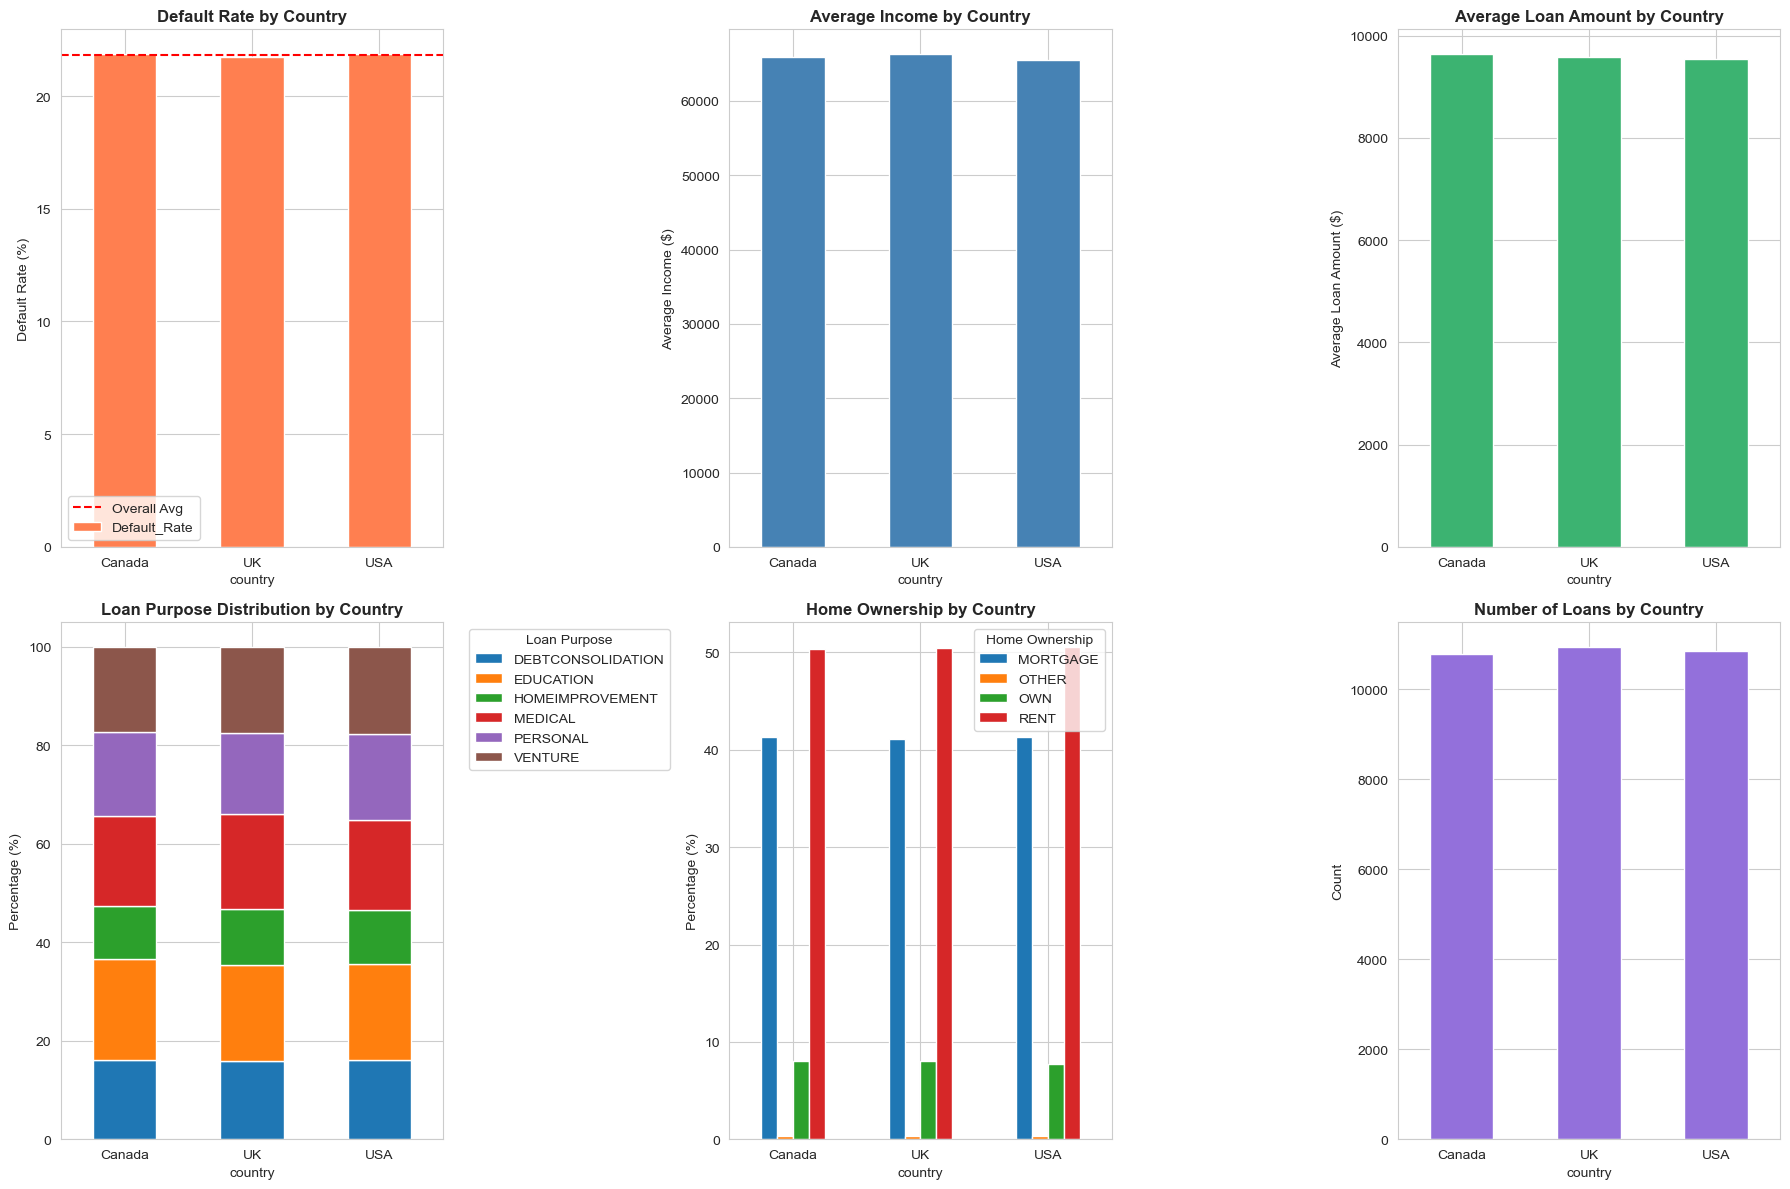


Chi-Square Test for Country vs Default:
Chi-square statistic: 0.08
P-value: 0.9608
✗ No significant relationship between country and default


In [13]:
print("\n" + "=" * 70)
print("QUESTION 6: GEOGRAPHIC ANALYSIS (USA, UK, CANADA)")
print("=" * 70)

# Country Analysis
country_analysis = df.groupby('country').agg({
    'loan_status': ['mean', 'count'],
    'person_income': 'mean',
    'loan_amnt': 'mean',
    'loan_int_rate': 'mean',
    'person_age': 'mean'
})
country_analysis.columns = ['Default_Rate', 'Count', 'Avg_Income', 'Avg_Loan', 
                            'Avg_Interest_Rate', 'Avg_Age']
country_analysis['Default_Rate'] = country_analysis['Default_Rate'] * 100

print("Default Rate by Country:")
print(country_analysis)

# Loan purpose by country
country_purpose = pd.crosstab(df['country'], df['loan_intent'], normalize='index') * 100
print("\nLoan Purpose Distribution by Country (%):")
print(country_purpose)

# Home ownership by country
country_home = pd.crosstab(df['country'], df['person_home_ownership'], normalize='index') * 100
print("\nHome Ownership Distribution by Country (%):")
print(country_home)

# Employment type by country
country_employment = pd.crosstab(df['country'], df['employment_type'], normalize='index') * 100
print("\nEmployment Type Distribution by Country (%):")
print(country_employment)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Default rate by country
country_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 0], color='coral')
axes[0, 0].set_title('Default Rate by Country', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=0)

# Average income by country
country_analysis['Avg_Income'].plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Average Income by Country', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Income ($)')
axes[0, 1].tick_params(axis='x', rotation=0)

# Average loan amount by country
country_analysis['Avg_Loan'].plot(kind='bar', ax=axes[0, 2], color='mediumseagreen')
axes[0, 2].set_title('Average Loan Amount by Country', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Average Loan Amount ($)')
axes[0, 2].tick_params(axis='x', rotation=0)

# Loan purpose by country
country_purpose.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Loan Purpose Distribution by Country', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1))
axes[1, 0].tick_params(axis='x', rotation=0)

# Home ownership by country
country_home.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Home Ownership by Country', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].legend(title='Home Ownership')
axes[1, 1].tick_params(axis='x', rotation=0)

# Sample count by country
country_analysis['Count'].plot(kind='bar', ax=axes[1, 2], color='mediumpurple')
axes[1, 2].set_title('Number of Loans by Country', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('EDA_Figures/q6_geographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test
contingency_country = pd.crosstab(df['country'], df['loan_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_country)

print(f"\nChi-Square Test for Country vs Default:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✓ Country significantly affects default rate (p < 0.05)")
else:
    print("✗ No significant relationship between country and default")

### 7. Which loan grades or terms seem safer/riskier? ###


QUESTION 7: LOAN GRADE & TERM RISK ANALYSIS
Default Rate by Loan Grade:
            Default_Rate  Count  Avg_Interest_Rate  Avg_Loan_Amount  \
loan_grade                                                            
A               9.957313  10776           7.342745      8539.137899   
B              16.282186  10447          10.994914      9994.218436   
C              20.743610   6455          13.465242      9215.619675   
D              59.045780   3626          15.357022     10849.241589   
E              64.419087    964          16.993143     12915.845436   
F              70.539419    241          18.600851     14717.323651   
G              98.437500     64          20.244375     17195.703125   

              Avg_Income  
loan_grade                
A           66565.587324  
B           66339.850675  
C           63980.149342  
D           63663.682019  
E           70873.106846  
F           77008.730290  
G           76773.296875  

Default Rate by Loan Term:
                

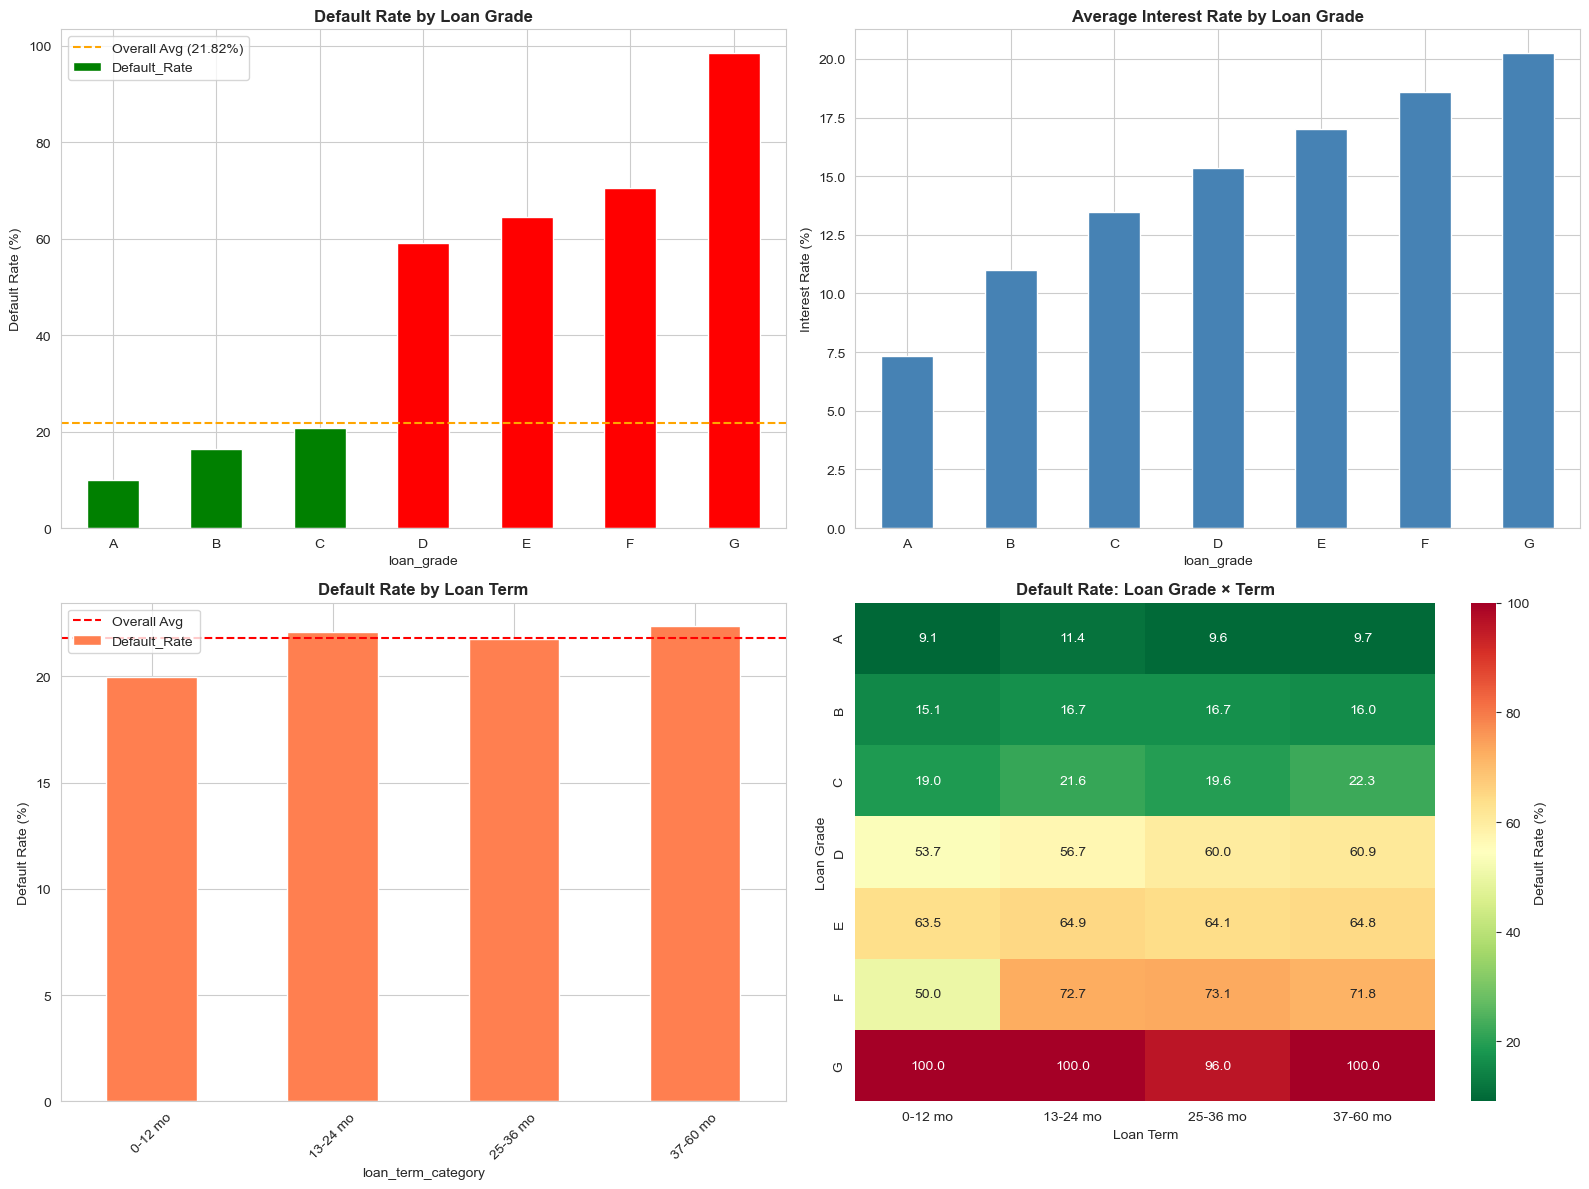

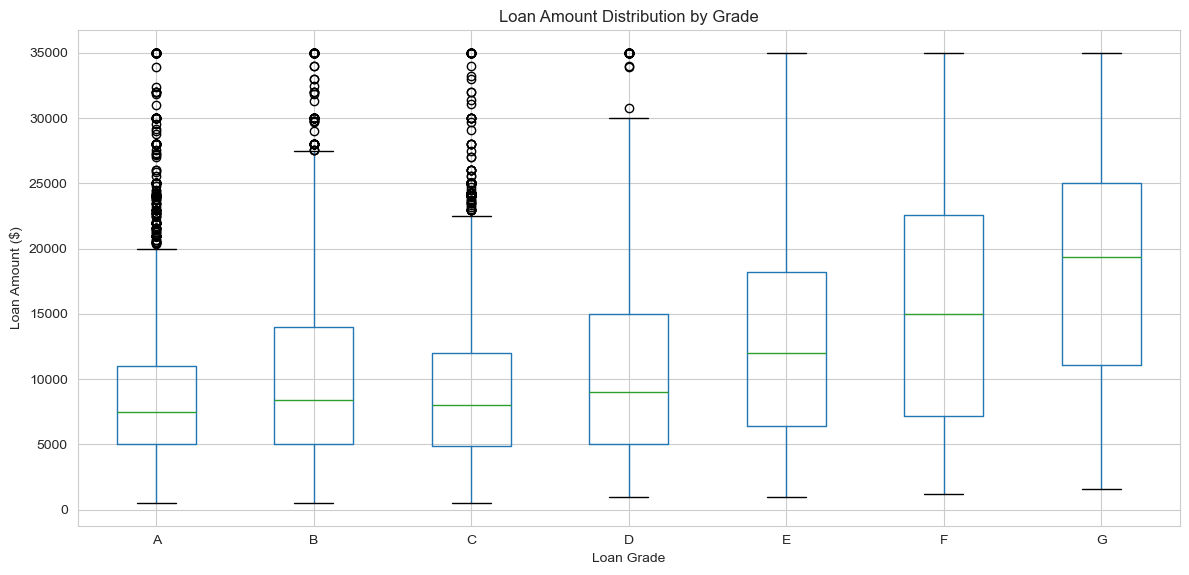


Correlation between Interest Rate and Default: 0.3337

Loan Grade Distribution:
loan_grade
A    10776
B    10447
C     6455
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Percentage distribution:
loan_grade
A    33.08
B    32.07
C    19.82
D    11.13
E     2.96
F     0.74
G     0.20
Name: count, dtype: float64


In [14]:
print("\n" + "=" * 70)
print("QUESTION 7: LOAN GRADE & TERM RISK ANALYSIS")
print("=" * 70)
# Loan Grade Analysis
grade_analysis = df.groupby('loan_grade').agg({
    'loan_status': ['mean', 'count'],
    'loan_int_rate': 'mean',
    'loan_amnt': 'mean',
    'person_income': 'mean'
})
grade_analysis.columns = ['Default_Rate', 'Count', 'Avg_Interest_Rate', 
                          'Avg_Loan_Amount', 'Avg_Income']
grade_analysis['Default_Rate'] = grade_analysis['Default_Rate'] * 100
grade_analysis = grade_analysis.sort_index()

print("Default Rate by Loan Grade:")
print(grade_analysis)

# Loan Term Analysis
df['loan_term_category'] = pd.cut(df['loan_term_months'],
                                   bins=[0, 12, 24, 36, 60],
                                   labels=['0-12 mo', '13-24 mo', '25-36 mo', '37-60 mo'])

term_analysis = df.groupby('loan_term_category', observed=False)['loan_status'].agg(['mean', 'count'])
term_analysis.columns = ['Default_Rate', 'Count']
term_analysis['Default_Rate'] = term_analysis['Default_Rate'] * 100

print("\nDefault Rate by Loan Term:")
print(term_analysis)

# Combined: Grade + Term
grade_term = df.groupby(['loan_grade', 'loan_term_category'], observed=False)['loan_status'].mean() * 100
grade_term_df = grade_term.unstack()

print("\nDefault Rate by Loan Grade × Term (%):")
print(grade_term_df)

# Risk categorization
print("\n--- RISK CATEGORIZATION ---")
print("SAFER LOAN GRADES (Low Default Rate):")
safe_grades = grade_analysis[grade_analysis['Default_Rate'] < overall_default_rate]
print(safe_grades[['Default_Rate', 'Count', 'Avg_Interest_Rate']])

print("\nRISKIER LOAN GRADES (High Default Rate):")
risky_grades = grade_analysis[grade_analysis['Default_Rate'] >= overall_default_rate]
print(risky_grades[['Default_Rate', 'Count', 'Avg_Interest_Rate']])

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Default rate by loan grade
grade_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 0], 
                                    color=['green' if x < overall_default_rate else 'red' 
                                          for x in grade_analysis['Default_Rate']])
axes[0, 0].set_title('Default Rate by Loan Grade', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].axhline(y=overall_default_rate, color='orange', linestyle='--', 
                   label=f'Overall Avg ({overall_default_rate:.2f}%)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=0)

# Interest rate by loan grade
grade_analysis['Avg_Interest_Rate'].plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Average Interest Rate by Loan Grade', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Interest Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=0)

# Default rate by loan term
term_analysis['Default_Rate'].plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Default Rate by Loan Term', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Default Rate (%)')
axes[1, 0].axhline(y=overall_default_rate, color='r', linestyle='--', label='Overall Avg')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Heatmap: Grade × Term
import seaborn as sns
sns.heatmap(grade_term_df, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[1, 1], cbar_kws={'label': 'Default Rate (%)'})
axes[1, 1].set_title('Default Rate: Loan Grade × Term', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Loan Term')
axes[1, 1].set_ylabel('Loan Grade')

plt.tight_layout()
plt.savefig('EDA_Figures/q7_loangradeandterm_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Loan amount distribution by grade
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(column='loan_amnt', by='loan_grade', ax=ax)
ax.set_title('Loan Amount Distribution by Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Loan Amount ($)')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('EDA_Figures/q7_loangradeandterm_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Interest rate vs default rate correlation
print(f"\nCorrelation between Interest Rate and Default: {df['loan_int_rate'].corr(df['loan_status']):.4f}")

# Grade distribution
print("\nLoan Grade Distribution:")
grade_dist = df['loan_grade'].value_counts().sort_index()
print(grade_dist)
print(f"\nPercentage distribution:")
print((grade_dist / len(df) * 100).round(2))

### 8. Can we identify "safe" versus "risky" borrower groups? ###


QUESTION 8: BORROWER SEGMENTATION - SAFE vs RISKY
Risk Score Distribution:
risk_score
0    13767
1    13678
2     4104
3      883
4      134
5        7
Name: count, dtype: int64

Risk Score Range: 0 to 5

Borrower Segmentation by Risk Category:
               Default_Rate  Count      Avg_Loan  Avg_Interest_Rate  \
risk_category                                                         
Low Risk          18.367644  27445   9694.912552          10.732633   
Medium Risk       39.262081   4987   8992.560658          12.379439   
High Risk         77.304965    141  10134.929078          17.435780   

                 Avg_Income  
risk_category                
Low Risk       68522.135070  
Medium Risk    51910.976740  
High Risk      46268.056738  

DETAILED PROFILES

--- LOW RISK BORROWERS ---
Count: 27445 (84.3%)
Default Rate: 18.37%
Risk Score Range: 0 to 1

Characteristics:
  Average Age: 28.1 years
  Average Income: $68,522
  Average Loan Amount: $9,695
  Average Interest Rate: 10.73%
  

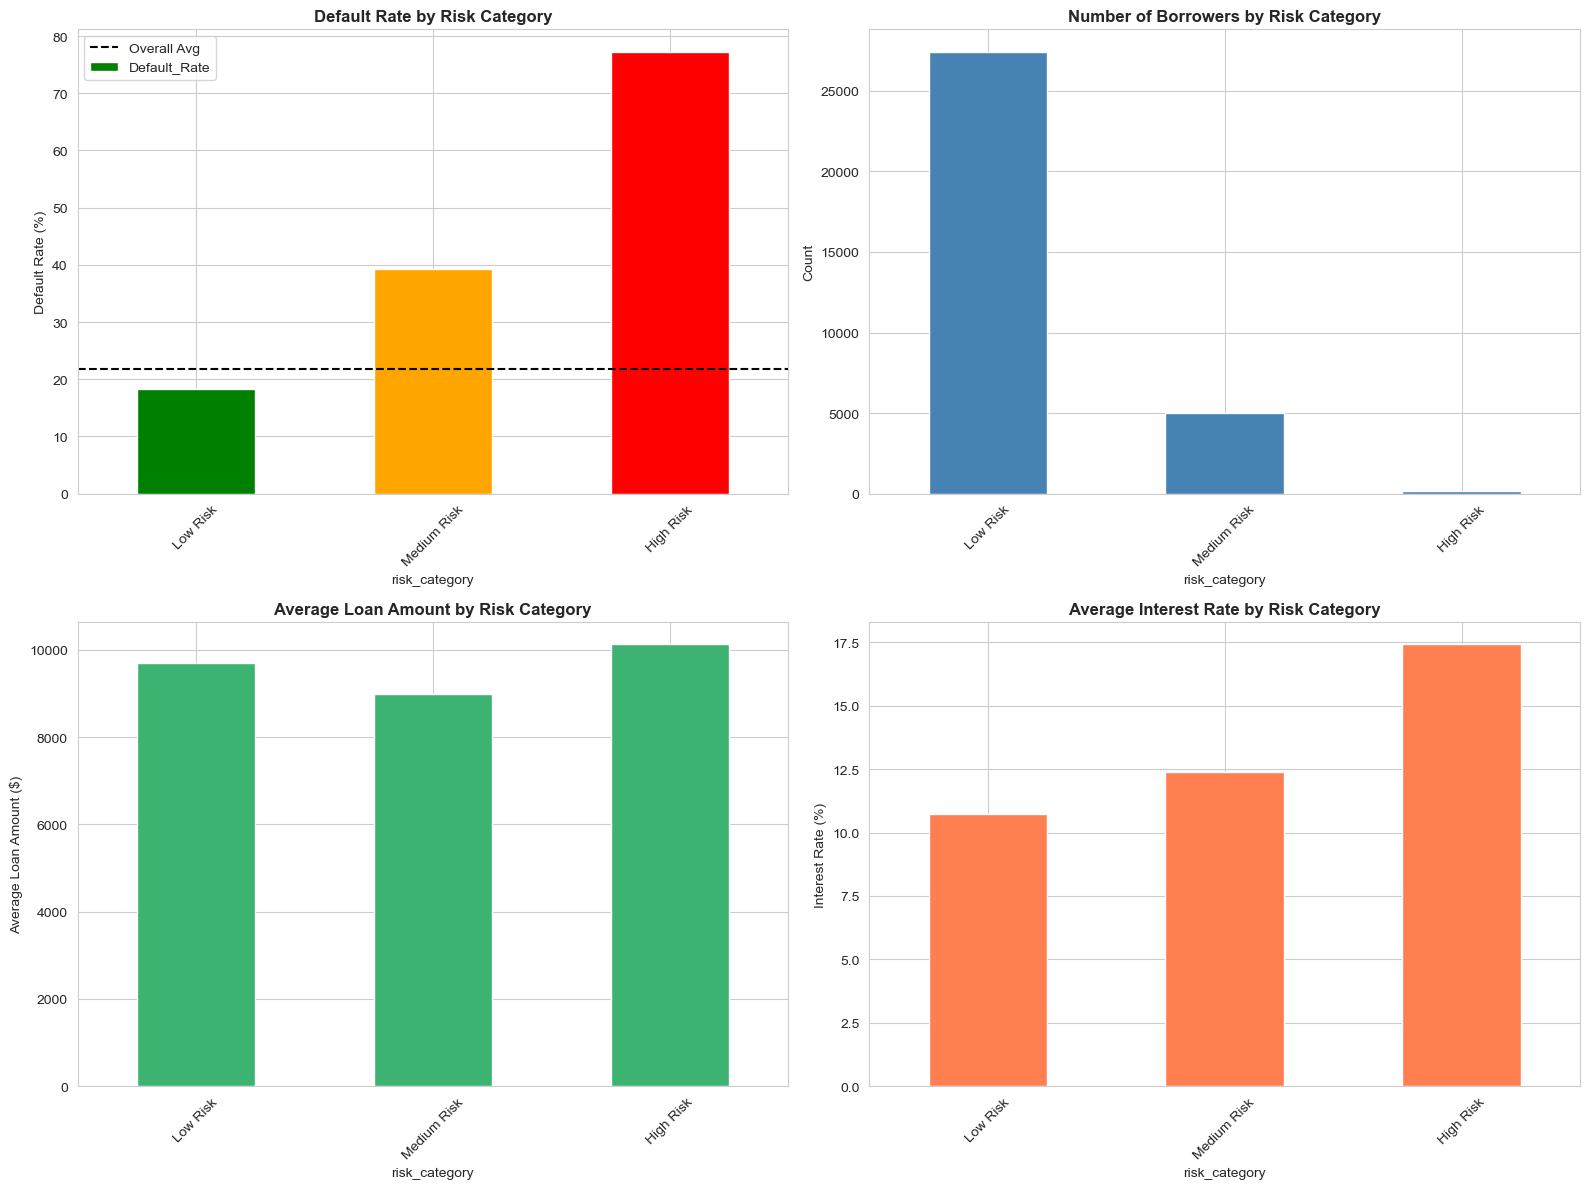

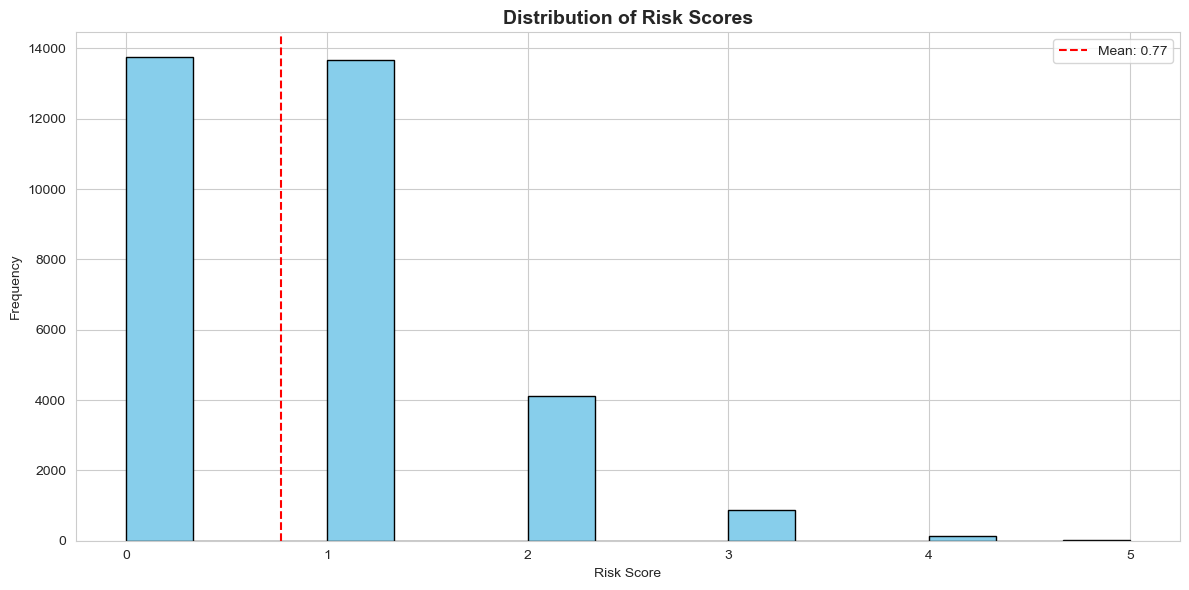

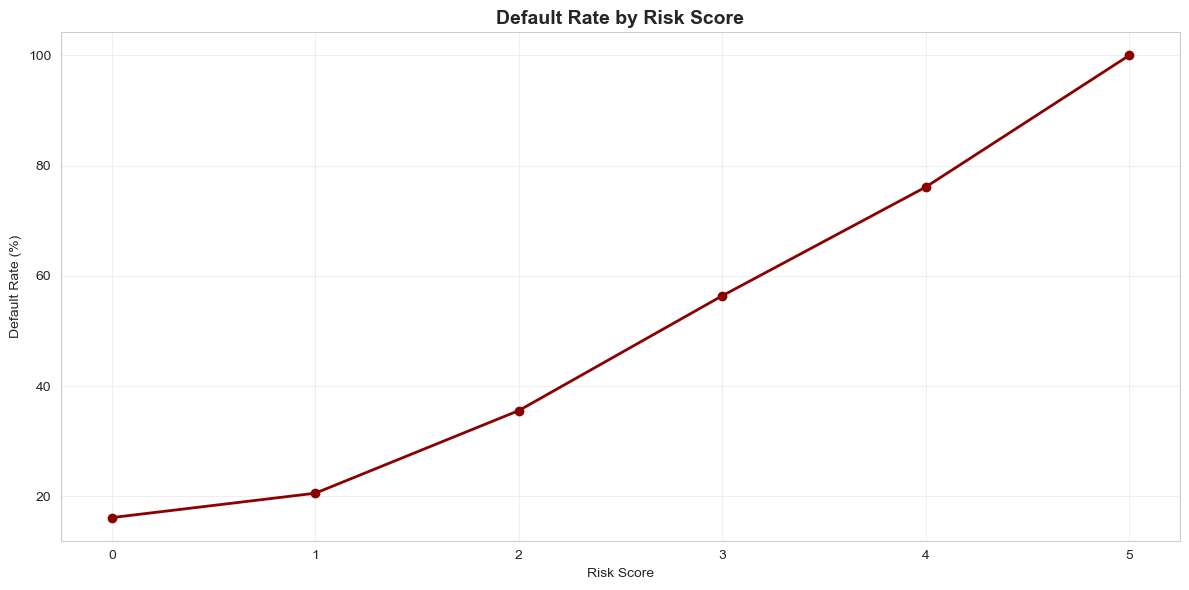

In [15]:
print("\n" + "=" * 70)
print("QUESTION 8: BORROWER SEGMENTATION - SAFE vs RISKY")
print("=" * 70)

# Create risk score based on key factors
df['risk_score'] = 0

# Add risk points for various factors
# High loan-to-income ratio
df.loc[df['loan_percent_income'] > 30, 'risk_score'] += 2
df.loc[df['loan_percent_income'] > 50, 'risk_score'] += 1

# High debt-to-income ratio
df.loc[df['debt_to_income_ratio'] > 40, 'risk_score'] += 2

# Past default
df.loc[df['cb_person_default_on_file'] == 'y', 'risk_score'] += 3

# Past delinquencies
df.loc[df['past_delinquencies'] > 0, 'risk_score'] += 1
df.loc[df['past_delinquencies'] > 3, 'risk_score'] += 1

# Short credit history
df.loc[df['cb_person_cred_hist_length'] < 3, 'risk_score'] += 1

# High credit utilization
df.loc[df['credit_utilization_ratio'] > 70, 'risk_score'] += 1

# Rental housing
df.loc[df['person_home_ownership'] == 'rent', 'risk_score'] += 1

# Low income
df.loc[df['person_income'] < 30000, 'risk_score'] += 1

# High-risk loan grades
high_risk_grades = ['E', 'F', 'G']
df.loc[df['loan_grade'].isin(high_risk_grades), 'risk_score'] += 2

# Check actual risk score distribution
print("Risk Score Distribution:")
print(df['risk_score'].value_counts().sort_index())
print(f"\nRisk Score Range: {df['risk_score'].min()} to {df['risk_score'].max()}")

# ADJUSTED: Categorize borrowers based on actual data distribution
df['risk_category'] = pd.cut(df['risk_score'], 
                              bins=[-0.1, 1.5, 3.5, 100],  # Adjusted bins
                              labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Analyze risk categories
risk_segment_analysis = df.groupby('risk_category', observed=True).agg({
    'loan_status': ['mean', 'count'],
    'loan_amnt': 'mean',
    'loan_int_rate': 'mean',
    'person_income': 'mean'
})
risk_segment_analysis.columns = ['Default_Rate', 'Count', 'Avg_Loan', 
                                 'Avg_Interest_Rate', 'Avg_Income']
risk_segment_analysis['Default_Rate'] = risk_segment_analysis['Default_Rate'] * 100

print("\nBorrower Segmentation by Risk Category:")
print(risk_segment_analysis)

# Profile each segment
print("\n" + "=" * 70)
print("DETAILED PROFILES")
print("=" * 70)

for category in ['Low Risk', 'Medium Risk', 'High Risk']:
    segment = df[df['risk_category'] == category]
    if len(segment) == 0:
        continue
    
    print(f"\n--- {category.upper()} BORROWERS ---")
    print(f"Count: {len(segment)} ({len(segment)/len(df)*100:.1f}%)")
    print(f"Default Rate: {segment['loan_status'].mean()*100:.2f}%")
    print(f"Risk Score Range: {segment['risk_score'].min()} to {segment['risk_score'].max()}")
    print(f"\nCharacteristics:")
    print(f"  Average Age: {segment['person_age'].mean():.1f} years")
    print(f"  Average Income: ${segment['person_income'].mean():,.0f}")
    print(f"  Average Loan Amount: ${segment['loan_amnt'].mean():,.0f}")
    print(f"  Average Interest Rate: {segment['loan_int_rate'].mean():.2f}%")
    print(f"  Average Loan-to-Income: {segment['loan_percent_income'].mean():.1f}%")
    print(f"  Average DTI: {segment['debt_to_income_ratio'].mean():.1f}%")
    print(f"\nMost Common:")
    print(f"  Loan Grade: {segment['loan_grade'].mode().values[0] if len(segment['loan_grade'].mode()) > 0 else 'N/A'}")
    print(f"  Loan Purpose: {segment['loan_intent'].mode().values[0] if len(segment['loan_intent'].mode()) > 0 else 'N/A'}")
    print(f"  Home Ownership: {segment['person_home_ownership'].mode().values[0] if len(segment['person_home_ownership'].mode()) > 0 else 'N/A'}")
    print(f"  Employment Type: {segment['employment_type'].mode().values[0] if len(segment['employment_type'].mode()) > 0 else 'N/A'}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Default rate by risk category
colors = ['green', 'orange', 'red']
risk_segment_analysis['Default_Rate'].plot(kind='bar', ax=axes[0, 0], 
                                          color=colors[:len(risk_segment_analysis)])
axes[0, 0].set_title('Default Rate by Risk Category', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Default Rate (%)')
axes[0, 0].axhline(y=overall_default_rate, color='black', linestyle='--', 
                   label='Overall Avg')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Count by risk category
risk_segment_analysis['Count'].plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Number of Borrowers by Risk Category', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average loan amount by risk category
risk_segment_analysis['Avg_Loan'].plot(kind='bar', ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Average Loan Amount by Risk Category', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Loan Amount ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average interest rate by risk category
risk_segment_analysis['Avg_Interest_Rate'].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Average Interest Rate by Risk Category', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Interest Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('EDA_Figures/q8_borrower_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of risk scores
fig, ax = plt.subplots(figsize=(12, 6))
df['risk_score'].hist(bins=15, ax=ax, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Risk Scores', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Frequency')
ax.axvline(x=df['risk_score'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["risk_score"].mean():.2f}')
ax.legend()
plt.tight_layout()
plt.savefig('EDA_Figures/q8_borrower_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter plot: Risk Score vs Default
fig, ax = plt.subplots(figsize=(12, 6))
risk_score_default = df.groupby('risk_score')['loan_status'].mean() * 100
risk_score_default.plot(kind='line', marker='o', ax=ax, color='darkred', linewidth=2)
ax.set_title('Default Rate by Risk Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Default Rate (%)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('EDA_Figures/q8_borrower_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
print("\n" + "=" * 70)
print("COMPREHENSIVE SUMMARY REPORT")
print("=" * 70)

print(f"\nDataset Overview:")
print(f"  Total Loans: {len(df):,}")
print(f"  Overall Default Rate: {overall_default_rate:.2f}%")
print(f"  Date Range: {df.shape}")

print("\n" + "-" * 70)
print("KEY FINDINGS")
print("-" * 70)

print("\n1. HIGHEST RISK BORROWER CHARACTERISTICS:")
print("   ✗ Past default on file")
print("   ✗ High debt-to-income ratio (>40%)")
print("   ✗ High loan-to-income ratio (>30%)")
print("   ✗ Multiple past delinquencies")
print("   ✗ Short credit history (<3 years)")
print("   ✗ Loan grades E, F, G")

print("\n2. LOWEST RISK BORROWER CHARACTERISTICS:")
print("   ✓ No past defaults")
print("   ✓ Low debt-to-income ratio (<35%)")
print("   ✓ Stable employment (>5 years)")
print("   ✓ Home ownership")
print("   ✓ Long credit history (>10 years)")
print("   ✓ Loan grades A, B, C")

print("\n3. LOAN PURPOSE RISK:")
highest_risk_purpose = intent_analysis['Default_Rate'].idxmax()
lowest_risk_purpose = intent_analysis['Default_Rate'].idxmin()
print(f"   Highest Risk: {highest_risk_purpose} ({intent_analysis.loc[highest_risk_purpose, 'Default_Rate']:.2f}%)")
print(f"   Lowest Risk: {lowest_risk_purpose} ({intent_analysis.loc[lowest_risk_purpose, 'Default_Rate']:.2f}%)")

print("\n4. GEOGRAPHIC DIFFERENCES:")
for country in country_analysis.index:
    rate = country_analysis.loc[country, 'Default_Rate']
    comparison = "HIGHER" if rate > overall_default_rate else "LOWER"
    print(f"   {country}: {rate:.2f}% ({comparison} than average)")

print("\n5. LOAN GRADE PERFORMANCE:")
print("   Safer Grades (below average default):")
for grade in safe_grades.index:
    print(f"     - Grade {grade}: {safe_grades.loc[grade, 'Default_Rate']:.2f}% default rate")
print("   Riskier Grades (above average default):")
for grade in risky_grades.index:
    print(f"     - Grade {grade}: {risky_grades.loc[grade, 'Default_Rate']:.2f}% default rate")

print("\n6. RECOMMENDED ACTIONS:")
print("   • Implement stricter criteria for borrowers with past defaults")
print("   • Cap loan-to-income ratio at 30% for high-risk segments")
print("   • Require higher down payments for renters vs. homeowners")
print("   • Increase interest rates for loan grades D and below")
print("   • Prioritize borrowers with 5+ years employment history")
print("   • Monitor high-risk loan purposes more closely")

print("\n" + "=" * 70)


COMPREHENSIVE SUMMARY REPORT

Dataset Overview:
  Total Loans: 32,573
  Overall Default Rate: 21.82%
  Date Range: (32573, 40)

----------------------------------------------------------------------
KEY FINDINGS
----------------------------------------------------------------------

1. HIGHEST RISK BORROWER CHARACTERISTICS:
   ✗ Past default on file
   ✗ High debt-to-income ratio (>40%)
   ✗ High loan-to-income ratio (>30%)
   ✗ Multiple past delinquencies
   ✗ Short credit history (<3 years)
   ✗ Loan grades E, F, G

2. LOWEST RISK BORROWER CHARACTERISTICS:
   ✓ No past defaults
   ✓ Low debt-to-income ratio (<35%)
   ✓ Stable employment (>5 years)
   ✓ Home ownership
   ✓ Long credit history (>10 years)
   ✓ Loan grades A, B, C

3. LOAN PURPOSE RISK:
   Highest Risk: DEBTCONSOLIDATION (28.59%)
   Lowest Risk: VENTURE (14.82%)

4. GEOGRAPHIC DIFFERENCES:
   Canada: 21.87% (HIGHER than average)
   UK: 21.73% (LOWER than average)
   USA: 21.87% (HIGHER than average)

5. LOAN GRADE PERF

In [17]:
# Save key dataframes for reporting
print("\nSaving analysis results...")

# Create summary Excel file with multiple sheets
with pd.ExcelWriter('credit_risk_analysis_results.xlsx') as writer:
    grade_analysis.to_excel(writer, sheet_name='Loan_Grade_Analysis')
    intent_analysis.to_excel(writer, sheet_name='Loan_Purpose_Analysis')
    country_analysis.to_excel(writer, sheet_name='Country_Analysis')
    risk_segment_analysis.to_excel(writer, sheet_name='Risk_Segmentation')
    employment_analysis.to_excel(writer, sheet_name='Employment_Analysis')
    home_analysis.to_excel(writer, sheet_name='Home_Ownership_Analysis')
    
print("✓ Analysis results saved to 'credit_risk_analysis_results.xlsx'")

# Save the cleaned and analyzed dataset
df.to_csv('credit_risk_analyzed.csv', index=False)
print("✓ Analyzed dataset saved to 'credit_risk_analyzed.csv'")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)


Saving analysis results...
✓ Analysis results saved to 'credit_risk_analysis_results.xlsx'
✓ Analyzed dataset saved to 'credit_risk_analyzed.csv'

ANALYSIS COMPLETE!


In [20]:
!pip install python-pptx


In [21]:
from pptx import Presentation
from pptx.util import Inches, Pt
from datetime import datetime
import os

def create_eda_presentation():
    prs = Presentation()
    prs.slide_width = Inches(10)
    prs.slide_height = Inches(7.5)

    # Title Slide
    title_slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(title_slide_layout)
    slide.shapes.title.text = "Credit Risk EDA Analysis"
    slide.placeholders[1].text = f"Comprehensive Report\n{datetime.now().strftime('%B %d, %Y')}"

    # List of slides & images
    slides_data = [
        {
            'title': 'Question 1: Borrower Characteristics',
            'image': 'EDA_Figures/q1_borrower_characteristics.png'
                    
        },
        {
            'title': 'Question 2: Loan Purpose Risk',
            'image': 'EDA_Figures/q2_loan_purpose.png'
        },
        {
            'title': 'Question 3: Financial Ratios',
            'image': 'EDA_Figures/q3_financial_ratios.png'
        },
        {
            'title': 'Question 4: Employment & Home Ownership',
            'image': 'EDA_Figures/q4_employmentandhome_ownership.png'
        },
        {
            'title': 'Question 5: Credit History Impact',
            'image': 'EDA_Figures/q5_credit_history.png'
        },
        {
            'title': 'Question 6: Geographic Analysis',
            'image': 'EDA_Figures/q6_geographic_analysis.png'
        },
        {
            'title': 'Question 7: Loan Grade & Term',
            'image': 'EDA_Figures/q7_loangradeandterm_analysis.png'
        },
        {
            'title': 'Question 8: Risk Segmentation',
            'image': 'EDA_Figures/q8_borrower_segmentation.png'
        }
    ]

    # Blank layout for content slides
    blank_layout = prs.slide_layouts[6]

    for s in slides_data:
        slide = prs.slides.add_slide(blank_layout)

        # Title
        title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.3), Inches(9), Inches(0.7))
        tf = title_box.text_frame
        tf.text = s['title']
        tf.paragraphs[0].font.size = Pt(28)
        tf.paragraphs[0].font.bold = True

        # Image
        if os.path.exists(s['image']):
            slide.shapes.add_picture(
                s['image'], 
                Inches(0.5), 
                Inches(1.2), 
                width=Inches(9)
            )
        else:
            print(f"⚠ Image not found: {s['image']}")

    # Save
    if not os.path.exists("EDA_Output"):
        os.makedirs("EDA_Output")

    ppt_path = "EDA_Output/Credit_Risk_EDA_Presentation.pptx"
    prs.save(ppt_path)
    print(f"✓ PowerPoint created: {ppt_path}")


# Run it
create_eda_presentation()


✓ PowerPoint created: EDA_Output/Credit_Risk_EDA_Presentation.pptx
